In [1]:
%matplotlib inline
projecttitle = 'LanguageMVPA'
import sys
import os
if sys.platform == 'darwin':
    sys.path.append(os.path.join("/Users", "njchiang", "GitHub", "task-fmri-utils"))
    sys.path.append(os.path.join("/Volumes", "JEFF", "UCLA", projecttitle, "code"))
else:
    sys.path.append(os.path.join("D:\\", "GitHub", "task-fmri-utils"))
    sys.path.append(os.path.join("D:\\", "GitHub", "task-fmri-utils", "code-init"))

    sys.path.append(os.path.join("D:\\", "fmri", projecttitle, "code"))

In [2]:
from project_code import projectutils as pu
from fmri_core import projectanalysis as pa
import logging

C:\Users\jeffn\Anaconda2\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


In [3]:
paths, sublist, contrasts = pu.initpaths()
con = 'syntax'
debug = False
write = False
roi = 'left_IFG_operc'
dstype = 'raw'
r = 4  # searchlight radius
sg_params = [49, 2]

Initializing...


In [4]:
# need a trial_type attribute
sublist={'LMVPA001': ["Run1", "Run2"]}
print "Mask: " + str(roi)
print "Full Model: " + str(con)
print "Searchlight Radius: " + str(r)
print "Write results: " + str(write)
logging.basicConfig(level=logging.DEBUG)

Mask: left_IFG_operc
Full Model: syntax
Searchlight Radius: 4
Write results: False


In [5]:
mc_params = pu.loadmotionparams(paths, sublist)

In [8]:
for s in sublist.keys():
    if dstype == "LSS" or dstype == "LSA":
        rds = pu.preprocess_betas(paths, sub, btype="LSS", c="trial_type", roi=roi, z=True)
    else:
        ds, events = pu.preprocess_data(paths, sublist, s, 
                                        filter_params=sg_params, roi=roi, z=True)
        design_kwargs = {'add_regs': mc_params[s], 'hrf_model': 'canonical'}
        evds = pa.beta_extract(ds, events, design_kwargs=design_kwargs)
        fds = pu.replacetargets(evds, contrasts, con)
        rds = fds[fds.targets != '0']
    writeopts = {'outdir': os.path.join('multivariate', 'searchlight'), 
                 'sub': s, 'roi': roi,  'con': con}
    sorted_rds = pu.sortds(rds, c='trial_type')
    res = pa.searchlight(paths, ds, r=2, clf=None, cv=None, writeopts=None)

loading LMVPA001


searchlights
running SL at 20:10:26


KeyError: 'targets'

loading LMVPA001


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.479


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.004


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01300, max corr=0.44575, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01300, max corr=0.44574, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01301, max corr=0.44573, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01303, max corr=0.44572, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01305, max corr=0.44569, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01308, max corr=0.44566, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01312, max corr=0.44561, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01319, max corr=0.44554, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01328, max corr=0.44544, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01341, max corr=0.44529, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01360, max corr=0.44509, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01385, max corr=0.44480, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01420, max corr=0.44441, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01466, max corr=0.44389, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01525, max corr=0.44322, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01599, max corr=0.44242, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01687, max corr=0.44152, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01791, max corr=0.44064, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01909, max corr=0.44002, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02039, max corr=0.44001, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02176, max corr=0.44116, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02319, max corr=0.44409, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02469, max corr=0.44942, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02620, max corr=0.45751, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02754, max corr=0.46814, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.02849, max corr=0.47995, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.02909, max corr=0.48973, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.02961, max corr=0.49242, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.03030, max corr=0.48345, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.03114, max corr=0.46260, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.03205, max corr=0.43495, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.03289, max corr=0.40690, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.03361, max corr=0.38256, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.03418, max corr=0.36333, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.03461, max corr=0.34893, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.03492, max corr=0.33850, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.03515, max corr=0.33108, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.03530, max corr=0.32588, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.03542, max corr=0.32225, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.03549, max corr=0.31982, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.03555, max corr=0.31986, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.03558, max corr=0.31989, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.03561, max corr=0.31991, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.03563, max corr=0.31992, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.03564, max corr=0.31993, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.03565, max corr=0.31994, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.03565, max corr=0.31994, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.03566, max corr=0.31994, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.03566, max corr=0.31994, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.03566, max corr=0.31994, over-under(0.20)=-13


INFO:counter:1/50 items complete (25.64 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.589


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.016


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.00690, max corr=0.46059, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.00690, max corr=0.46059, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.00691, max corr=0.46059, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.00693, max corr=0.46058, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.00695, max corr=0.46057, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.00698, max corr=0.46055, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.00702, max corr=0.46053, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00708, max corr=0.46049, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00718, max corr=0.46044, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00731, max corr=0.46037, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00750, max corr=0.46026, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00778, max corr=0.46009, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.00817, max corr=0.45983, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00871, max corr=0.45945, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.00945, max corr=0.45886, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01041, max corr=0.45798, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01164, max corr=0.45666, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01317, max corr=0.45469, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01509, max corr=0.45180, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01753, max corr=0.44758, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02063, max corr=0.44146, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02446, max corr=0.43263, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02900, max corr=0.42000, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.03409, max corr=0.40339, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03950, max corr=0.40866, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04492, max corr=0.41314, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05001, max corr=0.41306, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05450, max corr=0.40904, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05823, max corr=0.40221, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06117, max corr=0.39385, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06340, max corr=0.38513, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06503, max corr=0.37694, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.06619, max corr=0.36982, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.06700, max corr=0.36400, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06757, max corr=0.35947, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06796, max corr=0.35606, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06822, max corr=0.35356, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06840, max corr=0.35177, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06853, max corr=0.35050, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06862, max corr=0.34967, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06868, max corr=0.34932, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06872, max corr=0.34908, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06874, max corr=0.34891, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06876, max corr=0.34879, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06878, max corr=0.34871, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06878, max corr=0.34866, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06879, max corr=0.34862, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06880, max corr=0.34860, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06880, max corr=0.34858, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06880, max corr=0.34857, over-under(0.20)=-25


INFO:counter:2/50 items complete (25.32 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 20.629


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.010


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02857, max corr=0.53529, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02855, max corr=0.53519, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02853, max corr=0.53505, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02850, max corr=0.53485, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02846, max corr=0.53456, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02840, max corr=0.53414, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02831, max corr=0.53353, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02818, max corr=0.53264, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02799, max corr=0.53137, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.02772, max corr=0.52954, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.02735, max corr=0.52696, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.02682, max corr=0.52333, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.02611, max corr=0.51833, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.02516, max corr=0.51160, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.02395, max corr=0.50284, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02246, max corr=0.49194, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02072, max corr=0.47909, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.01882, max corr=0.46490, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.01684, max corr=0.45030, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.01486, max corr=0.43954, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01292, max corr=0.43242, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01093, max corr=0.42381, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00883, max corr=0.41288, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00655, max corr=0.40236, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00407, max corr=0.40075, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.00128, max corr=0.40154, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00194, max corr=0.41027, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00546, max corr=0.41660, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.00895, max corr=0.42039, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01216, max corr=0.42197, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01493, max corr=0.42194, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.01721, max corr=0.42130, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.01901, max corr=0.42294, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02040, max corr=0.42402, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02144, max corr=0.42471, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02220, max corr=0.42515, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02274, max corr=0.42543, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02312, max corr=0.42561, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02339, max corr=0.42573, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02358, max corr=0.42580, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02371, max corr=0.42585, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02380, max corr=0.42589, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02386, max corr=0.42591, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02390, max corr=0.42593, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02393, max corr=0.42594, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02395, max corr=0.42595, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02397, max corr=0.42595, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02398, max corr=0.42595, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02398, max corr=0.42596, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02399, max corr=0.42596, over-under(0.20)=-10


INFO:counter:3/50 items complete (19.48 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.003


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.011


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01099, max corr=0.34251, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01100, max corr=0.34250, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01101, max corr=0.34248, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01103, max corr=0.34245, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01106, max corr=0.34240, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01110, max corr=0.34233, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01116, max corr=0.34223, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01124, max corr=0.34208, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01135, max corr=0.34186, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01151, max corr=0.34153, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01174, max corr=0.34102, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01204, max corr=0.34025, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01245, max corr=0.33906, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01296, max corr=0.33725, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01359, max corr=0.33453, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01434, max corr=0.33057, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01520, max corr=0.32503, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01619, max corr=0.31767, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01735, max corr=0.30839, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01877, max corr=0.29730, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02052, max corr=0.28477, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02267, max corr=0.27582, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02530, max corr=0.27498, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02842, max corr=0.27367, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03207, max corr=0.27181, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03619, max corr=0.26924, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.04065, max corr=0.26570, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04518, max corr=0.26098, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04949, max corr=0.26095, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05332, max corr=0.26295, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05650, max corr=0.26643, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05901, max corr=0.26973, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.06091, max corr=0.27230, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.06231, max corr=0.27424, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06332, max corr=0.27567, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06404, max corr=0.27669, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06454, max corr=0.27742, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06489, max corr=0.27794, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06513, max corr=0.27830, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06530, max corr=0.27855, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06542, max corr=0.27872, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06550, max corr=0.27884, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06555, max corr=0.27892, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06559, max corr=0.27898, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06562, max corr=0.27901, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06564, max corr=0.27904, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06565, max corr=0.27906, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06566, max corr=0.27907, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06566, max corr=0.27908, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06567, max corr=0.27909, over-under(0.20)=-34


INFO:counter:4/50 items complete (18.60 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.569


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.036


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.05173, max corr=0.58234, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.05176, max corr=0.58230, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.05180, max corr=0.58225, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.05186, max corr=0.58217, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.05195, max corr=0.58204, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.05208, max corr=0.58183, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.05227, max corr=0.58147, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.05253, max corr=0.58083, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.05290, max corr=0.57969, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.05342, max corr=0.57761, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.05413, max corr=0.57377, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.05507, max corr=0.56675, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.05628, max corr=0.55432, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05775, max corr=0.53360, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05940, max corr=0.50311, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06101, max corr=0.50285, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06226, max corr=0.50202, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06279, max corr=0.50032, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06237, max corr=0.49741, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06106, max corr=0.50471, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05911, max corr=0.52059, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05675, max corr=0.53527, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05414, max corr=0.54867, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05133, max corr=0.55965, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.04834, max corr=0.56530, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.04515, max corr=0.56049, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04176, max corr=0.53869, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03824, max corr=0.49548, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03471, max corr=0.45228, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03140, max corr=0.45663, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.02847, max corr=0.45837, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.02602, max corr=0.45741, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.02407, max corr=0.45441, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.02258, max corr=0.45038, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.02147, max corr=0.44622, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.02065, max corr=0.44250, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.02007, max corr=0.43946, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01966, max corr=0.43710, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01937, max corr=0.43534, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01917, max corr=0.43407, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01903, max corr=0.43316, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01893, max corr=0.43252, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01887, max corr=0.43207, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01882, max corr=0.43176, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01879, max corr=0.43155, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01877, max corr=0.43140, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01875, max corr=0.43130, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01874, max corr=0.43123, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01874, max corr=0.43118, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01873, max corr=0.43114, over-under(0.20)=8


INFO:counter:5/50 items complete (18.66 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.550


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.040


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.00751, max corr=0.44325, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.00753, max corr=0.44326, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.00756, max corr=0.44327, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.00761, max corr=0.44329, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.00767, max corr=0.44331, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.00777, max corr=0.44334, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.00790, max corr=0.44337, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00810, max corr=0.44337, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00838, max corr=0.44331, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00878, max corr=0.44309, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00935, max corr=0.44248, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01016, max corr=0.44103, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01127, max corr=0.43788, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01277, max corr=0.43142, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01473, max corr=0.44171, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01719, max corr=0.45534, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02015, max corr=0.46954, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02354, max corr=0.48391, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02734, max corr=0.49795, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03159, max corr=0.51076, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03629, max corr=0.52083, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04146, max corr=0.52619, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04713, max corr=0.52491, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.05328, max corr=0.51579, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05980, max corr=0.49887, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.06647, max corr=0.47541, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.07298, max corr=0.44748, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.07901, max corr=0.41730, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.08430, max corr=0.38680, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.08871, max corr=0.35756, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.09221, max corr=0.33088, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.09490, max corr=0.32260, over-under(0.20)=-53


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.09689, max corr=0.31877, over-under(0.20)=-54


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.09834, max corr=0.31555, over-under(0.20)=-54


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.09937, max corr=0.31299, over-under(0.20)=-54


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.10010, max corr=0.31102, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.10062, max corr=0.30956, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.10097, max corr=0.30850, over-under(0.20)=-56


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.10122, max corr=0.30774, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.10139, max corr=0.30720, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.10151, max corr=0.30683, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.10159, max corr=0.30656, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.10164, max corr=0.30638, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.10168, max corr=0.30626, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.10171, max corr=0.30617, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.10173, max corr=0.30611, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.10174, max corr=0.30607, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.10175, max corr=0.30604, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.10175, max corr=0.30602, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.10176, max corr=0.30601, over-under(0.20)=-55


INFO:counter:6/50 items complete (18.24 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 20.924


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.011


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03422, max corr=0.47066, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03427, max corr=0.47078, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03435, max corr=0.47095, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03446, max corr=0.47120, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03462, max corr=0.47157, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03486, max corr=0.47210, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03520, max corr=0.47286, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03568, max corr=0.47395, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03639, max corr=0.47549, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03739, max corr=0.47765, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03879, max corr=0.48063, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.04075, max corr=0.48463, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.04339, max corr=0.48982, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04685, max corr=0.49624, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.05116, max corr=0.50364, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.05618, max corr=0.51135, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.06160, max corr=0.51827, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.06703, max corr=0.52304, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.07218, max corr=0.52458, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.07697, max corr=0.52255, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.08148, max corr=0.51746, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.08575, max corr=0.51035, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.08975, max corr=0.50231, over-under(0.20)=-49


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.09345, max corr=0.49417, over-under(0.20)=-52


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.09693, max corr=0.48639, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.10025, max corr=0.47909, over-under(0.20)=-52


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.10338, max corr=0.47216, over-under(0.20)=-54


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.10623, max corr=0.46543, over-under(0.20)=-53


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.10872, max corr=0.45878, over-under(0.20)=-56


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.11079, max corr=0.45230, over-under(0.20)=-57


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.11243, max corr=0.44620, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.11368, max corr=0.44072, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.11460, max corr=0.43607, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.11528, max corr=0.43231, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.11575, max corr=0.42939, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.11609, max corr=0.42720, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.11632, max corr=0.42560, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.11649, max corr=0.42445, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.11660, max corr=0.42364, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.11668, max corr=0.42307, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.11673, max corr=0.42267, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.11677, max corr=0.42239, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.11679, max corr=0.42220, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.11681, max corr=0.42207, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.11682, max corr=0.42198, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.11683, max corr=0.42192, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.11684, max corr=0.42188, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.11684, max corr=0.42185, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.11684, max corr=0.42183, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.11684, max corr=0.42181, over-under(0.20)=-61


INFO:counter:7/50 items complete (18.97 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.027


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.05587, max corr=0.47186, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.05588, max corr=0.47191, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.05588, max corr=0.47198, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.05588, max corr=0.47209, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.05588, max corr=0.47225, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.05589, max corr=0.47248, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.05589, max corr=0.47281, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.05589, max corr=0.47329, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.05589, max corr=0.47398, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.05588, max corr=0.47497, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.05585, max corr=0.47640, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.05576, max corr=0.47843, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.05557, max corr=0.48128, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05521, max corr=0.48520, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05456, max corr=0.49048, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05353, max corr=0.49730, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05202, max corr=0.50564, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.05003, max corr=0.51509, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04760, max corr=0.52458, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04477, max corr=0.53224, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.04155, max corr=0.53515, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03790, max corr=0.52893, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03378, max corr=0.51321, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.02919, max corr=0.50855, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.02426, max corr=0.50327, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01913, max corr=0.49823, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01401, max corr=0.49384, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00910, max corr=0.49019, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00458, max corr=0.48721, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.00062, max corr=0.48476, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00267, max corr=0.48273, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00528, max corr=0.48105, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00728, max corr=0.47968, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00877, max corr=0.47859, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00985, max corr=0.47775, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.01062, max corr=0.47712, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.01117, max corr=0.47665, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.01155, max corr=0.47632, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.01181, max corr=0.47608, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.01200, max corr=0.47591, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.01213, max corr=0.47580, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.01221, max corr=0.47572, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.01227, max corr=0.47566, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.01232, max corr=0.47562, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.01234, max corr=0.47559, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.01236, max corr=0.47558, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.01238, max corr=0.47556, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.01239, max corr=0.47555, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.01239, max corr=0.47555, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.01240, max corr=0.47554, over-under(0.20)=8


INFO:counter:8/50 items complete (19.70 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.661


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.037


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01061, max corr=0.46374, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01065, max corr=0.46371, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01070, max corr=0.46368, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01077, max corr=0.46363, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01088, max corr=0.46356, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01104, max corr=0.46345, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01126, max corr=0.46329, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01159, max corr=0.46303, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01206, max corr=0.46264, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01274, max corr=0.46203, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01369, max corr=0.46104, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01502, max corr=0.45947, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01685, max corr=0.45696, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01929, max corr=0.45306, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.02241, max corr=0.44728, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.02617, max corr=0.43930, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03038, max corr=0.42933, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03468, max corr=0.41826, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03870, max corr=0.40759, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.04217, max corr=0.40593, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.04504, max corr=0.40787, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04745, max corr=0.40942, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04964, max corr=0.41065, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.05185, max corr=0.41163, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05429, max corr=0.41616, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05695, max corr=0.42784, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05968, max corr=0.43704, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.06234, max corr=0.43981, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06478, max corr=0.43281, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06692, max corr=0.41686, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06869, max corr=0.41762, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.07008, max corr=0.41826, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07114, max corr=0.41877, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.07192, max corr=0.41915, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.07247, max corr=0.41944, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.07287, max corr=0.41965, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.07314, max corr=0.41980, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.07334, max corr=0.41991, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.07347, max corr=0.41998, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.07356, max corr=0.42003, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.07362, max corr=0.42007, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.07367, max corr=0.42009, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.07370, max corr=0.42011, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.07372, max corr=0.42012, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.07373, max corr=0.42013, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.07374, max corr=0.42013, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.07375, max corr=0.42014, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.07375, max corr=0.42014, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.07376, max corr=0.42014, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.07376, max corr=0.42014, over-under(0.20)=-37


INFO:counter:9/50 items complete (20.32 items/second, 00:00:02 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.383


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.016


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.08065, max corr=0.43672, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.08065, max corr=0.43676, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.08066, max corr=0.43681, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.08067, max corr=0.43690, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.08068, max corr=0.43701, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.08069, max corr=0.43718, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.08072, max corr=0.43742, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.08075, max corr=0.43776, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.08079, max corr=0.43823, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.08086, max corr=0.43888, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.08093, max corr=0.43973, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.08103, max corr=0.44082, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.08114, max corr=0.44210, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08124, max corr=0.44345, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08131, max corr=0.44462, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.08128, max corr=0.44520, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08111, max corr=0.44476, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08072, max corr=0.44405, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08007, max corr=0.44695, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.07918, max corr=0.44926, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.07811, max corr=0.45031, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.07698, max corr=0.44956, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07593, max corr=0.44678, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.07502, max corr=0.44213, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.07427, max corr=0.43603, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.07356, max corr=0.43581, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.07277, max corr=0.44234, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.07182, max corr=0.44986, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.07069, max corr=0.45800, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.06944, max corr=0.46600, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.06817, max corr=0.47303, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.06700, max corr=0.47851, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.06598, max corr=0.48231, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.06515, max corr=0.48467, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.06450, max corr=0.48602, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.06402, max corr=0.48672, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.06366, max corr=0.48706, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.06341, max corr=0.48720, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.06323, max corr=0.48726, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.06310, max corr=0.48727, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.06301, max corr=0.48727, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.06295, max corr=0.48726, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.06291, max corr=0.48726, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.06288, max corr=0.48725, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.06286, max corr=0.48724, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.06284, max corr=0.48724, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.06283, max corr=0.48724, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.06283, max corr=0.48723, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.06282, max corr=0.48723, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.06282, max corr=0.48723, over-under(0.20)=25


INFO:counter:10/50 items complete (20.75 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 25.191


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01284, max corr=0.31956, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01283, max corr=0.31956, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01280, max corr=0.31956, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01276, max corr=0.31956, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01271, max corr=0.31956, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01263, max corr=0.31955, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01252, max corr=0.31953, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01236, max corr=0.31947, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01213, max corr=0.31934, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01180, max corr=0.31909, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01133, max corr=0.31857, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01067, max corr=0.31757, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00977, max corr=0.31577, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00857, max corr=0.31275, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00704, max corr=0.30813, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00518, max corr=0.30774, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00307, max corr=0.31516, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00083, max corr=0.32206, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00139, max corr=0.32802, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.00348, max corr=0.33281, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00538, max corr=0.33630, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00701, max corr=0.33816, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.00839, max corr=0.33760, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.00964, max corr=0.33351, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.01094, max corr=0.37108, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.01231, max corr=0.44343, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.01370, max corr=0.51588, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.01530, max corr=0.54059, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01716, max corr=0.49502, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01894, max corr=0.42279, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.02036, max corr=0.41938, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02154, max corr=0.42801, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02252, max corr=0.43491, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02331, max corr=0.44024, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02389, max corr=0.44423, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02431, max corr=0.44715, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02461, max corr=0.44924, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02481, max corr=0.45072, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02495, max corr=0.45176, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02505, max corr=0.45248, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02512, max corr=0.45298, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02517, max corr=0.45333, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02520, max corr=0.45357, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02522, max corr=0.45373, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02524, max corr=0.45385, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02525, max corr=0.45392, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02526, max corr=0.45398, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02526, max corr=0.45401, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02526, max corr=0.45404, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02527, max corr=0.45406, over-under(0.20)=-16


INFO:counter:11/50 items complete (21.19 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 26.054


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.014


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00190, max corr=0.45824, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00185, max corr=0.45826, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00179, max corr=0.45828, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00169, max corr=0.45831, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00155, max corr=0.45835, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00136, max corr=0.45842, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00107, max corr=0.45849, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00067, max corr=0.45859, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00009, max corr=0.45869, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00073, max corr=0.45877, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00187, max corr=0.45875, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00341, max corr=0.45848, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.00545, max corr=0.45766, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00806, max corr=0.45587, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01123, max corr=0.45251, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01485, max corr=0.44693, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01866, max corr=0.46195, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02231, max corr=0.48351, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02543, max corr=0.50553, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02788, max corr=0.52671, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02969, max corr=0.54516, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03107, max corr=0.55909, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.03231, max corr=0.56797, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.03369, max corr=0.57281, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03542, max corr=0.57536, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03749, max corr=0.57710, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03984, max corr=0.57873, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04239, max corr=0.58035, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04495, max corr=0.58163, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04737, max corr=0.58207, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04954, max corr=0.58134, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05140, max corr=0.57939, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05292, max corr=0.57658, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05413, max corr=0.57340, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05504, max corr=0.57032, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05572, max corr=0.56763, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05621, max corr=0.56545, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05657, max corr=0.56377, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05681, max corr=0.56252, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05699, max corr=0.56161, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05711, max corr=0.56096, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05719, max corr=0.56051, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05725, max corr=0.56019, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05729, max corr=0.55996, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05731, max corr=0.55981, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05733, max corr=0.55970, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05734, max corr=0.55963, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05735, max corr=0.55958, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05736, max corr=0.55955, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05736, max corr=0.55952, over-under(0.20)=-31


INFO:counter:12/50 items complete (21.51 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.551


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.021


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04141, max corr=0.48911, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04143, max corr=0.48913, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04147, max corr=0.48916, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04152, max corr=0.48920, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04160, max corr=0.48926, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04171, max corr=0.48935, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04186, max corr=0.48947, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04209, max corr=0.48965, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04241, max corr=0.48989, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04287, max corr=0.49020, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04350, max corr=0.49060, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04437, max corr=0.49107, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04553, max corr=0.49157, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04701, max corr=0.49196, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04881, max corr=0.49202, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05084, max corr=0.49141, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05292, max corr=0.48966, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.05477, max corr=0.48617, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.05614, max corr=0.48027, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.05684, max corr=0.47122, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05690, max corr=0.46641, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05645, max corr=0.46209, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05571, max corr=0.45792, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05481, max corr=0.45419, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05385, max corr=0.45097, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.05286, max corr=0.44817, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05181, max corr=0.44556, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05064, max corr=0.44287, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04939, max corr=0.43993, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04811, max corr=0.43671, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04691, max corr=0.43336, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04583, max corr=0.43011, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.04493, max corr=0.42716, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04422, max corr=0.42467, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04367, max corr=0.42267, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04326, max corr=0.42113, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04296, max corr=0.41999, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04275, max corr=0.41916, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04260, max corr=0.41857, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04249, max corr=0.41815, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04242, max corr=0.41786, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04237, max corr=0.41766, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04233, max corr=0.41751, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04231, max corr=0.41742, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04229, max corr=0.41735, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04228, max corr=0.41730, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04227, max corr=0.41727, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04226, max corr=0.41725, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04226, max corr=0.41723, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04226, max corr=0.41722, over-under(0.20)=19


INFO:counter:13/50 items complete (21.78 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 19.827


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.025


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.00648, max corr=0.43800, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.00651, max corr=0.43790, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.00654, max corr=0.43775, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.00659, max corr=0.43753, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.00667, max corr=0.43721, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.00677, max corr=0.43676, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.00693, max corr=0.43610, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00715, max corr=0.43516, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00747, max corr=0.43383, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00794, max corr=0.43198, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00860, max corr=0.42943, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00952, max corr=0.42604, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01081, max corr=0.42460, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01255, max corr=0.42590, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01481, max corr=0.42710, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01759, max corr=0.42801, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02081, max corr=0.42842, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02425, max corr=0.42816, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02769, max corr=0.42710, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03098, max corr=0.42511, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03413, max corr=0.42204, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03730, max corr=0.41757, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04066, max corr=0.41884, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04427, max corr=0.42375, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04809, max corr=0.42498, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05201, max corr=0.42942, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05586, max corr=0.43483, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05948, max corr=0.44098, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06277, max corr=0.44730, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06566, max corr=0.45312, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06813, max corr=0.45793, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.07015, max corr=0.46158, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07175, max corr=0.46416, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.07297, max corr=0.46592, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.07387, max corr=0.46709, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.07452, max corr=0.46786, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.07498, max corr=0.46837, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.07531, max corr=0.46871, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.07554, max corr=0.46893, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.07569, max corr=0.46909, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.07580, max corr=0.46919, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.07588, max corr=0.46926, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.07593, max corr=0.46931, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.07597, max corr=0.46934, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.07599, max corr=0.46936, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.07601, max corr=0.46937, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.07602, max corr=0.46939, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.07603, max corr=0.46939, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.07604, max corr=0.46940, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.07604, max corr=0.46940, over-under(0.20)=-41


INFO:counter:14/50 items complete (21.91 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.824


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.010


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01943, max corr=0.40464, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01945, max corr=0.40461, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01948, max corr=0.40456, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01952, max corr=0.40449, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01959, max corr=0.40439, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01969, max corr=0.40424, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01982, max corr=0.40402, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.02002, max corr=0.40370, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.02030, max corr=0.40324, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.02070, max corr=0.40255, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.02125, max corr=0.40154, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.02201, max corr=0.40004, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.02302, max corr=0.39784, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.02432, max corr=0.39463, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.02591, max corr=0.39003, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.02776, max corr=0.38365, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02976, max corr=0.37514, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03179, max corr=0.36437, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03374, max corr=0.35138, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03555, max corr=0.33636, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03721, max corr=0.31959, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03880, max corr=0.31539, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04042, max corr=0.31658, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04218, max corr=0.31968, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04420, max corr=0.33916, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04653, max corr=0.34821, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.04912, max corr=0.34295, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05184, max corr=0.32853, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05449, max corr=0.32466, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05690, max corr=0.31234, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05893, max corr=0.29341, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06051, max corr=0.27207, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.06169, max corr=0.25215, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.06253, max corr=0.23560, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06311, max corr=0.22703, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06351, max corr=0.22725, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06379, max corr=0.22741, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06398, max corr=0.22753, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06411, max corr=0.22760, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06420, max corr=0.22766, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06426, max corr=0.22770, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06430, max corr=0.22772, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06433, max corr=0.22774, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06435, max corr=0.22775, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06436, max corr=0.22776, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06437, max corr=0.22777, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06438, max corr=0.22777, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06438, max corr=0.22777, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06438, max corr=0.22777, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06439, max corr=0.22778, over-under(0.20)=-33


INFO:counter:15/50 items complete (21.99 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.974


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.055


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.05314, max corr=0.55504, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.05317, max corr=0.55503, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.05321, max corr=0.55502, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.05327, max corr=0.55500, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.05335, max corr=0.55497, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.05347, max corr=0.55493, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.05364, max corr=0.55488, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.05389, max corr=0.55480, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.05425, max corr=0.55469, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.05475, max corr=0.55453, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.05546, max corr=0.55430, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.05643, max corr=0.55398, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.05775, max corr=0.55355, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.05949, max corr=0.55299, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.06170, max corr=0.55227, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.06440, max corr=0.55141, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.06756, max corr=0.55046, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.07111, max corr=0.54948, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.07496, max corr=0.54855, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.07908, max corr=0.54775, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.08349, max corr=0.54704, over-under(0.20)=-47


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.08834, max corr=0.54633, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.09377, max corr=0.54543, over-under(0.20)=-50


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.09990, max corr=0.54400, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.10664, max corr=0.54144, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.11373, max corr=0.53656, over-under(0.20)=-63


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.12076, max corr=0.52716, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.12732, max corr=0.51001, over-under(0.20)=-68


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.13309, max corr=0.48229, over-under(0.20)=-74


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.13792, max corr=0.44432, over-under(0.20)=-75


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.14175, max corr=0.40082, over-under(0.20)=-74


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.14466, max corr=0.38190, over-under(0.20)=-73


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.14679, max corr=0.37528, over-under(0.20)=-75


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.14830, max corr=0.36999, over-under(0.20)=-78


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.14937, max corr=0.36594, over-under(0.20)=-79


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.15012, max corr=0.36294, over-under(0.20)=-79


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.15064, max corr=0.36076, over-under(0.20)=-79


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.15100, max corr=0.35921, over-under(0.20)=-79


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.15125, max corr=0.35812, over-under(0.20)=-81


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.15142, max corr=0.35735, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.15154, max corr=0.35682, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.15162, max corr=0.35645, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.15168, max corr=0.35620, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.15172, max corr=0.35602, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.15174, max corr=0.35590, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.15176, max corr=0.35582, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.15177, max corr=0.35576, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.15178, max corr=0.35572, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.15179, max corr=0.35570, over-under(0.20)=-82


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.15179, max corr=0.35568, over-under(0.20)=-82


INFO:counter:16/50 items complete (22.16 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.710


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.003


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.04566, max corr=0.35278, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.04564, max corr=0.35278, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.04561, max corr=0.35277, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.04556, max corr=0.35277, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.04550, max corr=0.35276, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.04540, max corr=0.35274, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.04527, max corr=0.35271, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.04507, max corr=0.35266, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.04480, max corr=0.35258, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.04442, max corr=0.35243, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.04389, max corr=0.35216, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.04318, max corr=0.35167, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.04225, max corr=0.35075, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04107, max corr=0.35386, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03966, max corr=0.35739, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03808, max corr=0.36108, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03650, max corr=0.36472, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03518, max corr=0.36814, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03444, max corr=0.37128, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03456, max corr=0.37420, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03571, max corr=0.37701, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03789, max corr=0.37978, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04090, max corr=0.38222, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04443, max corr=0.38339, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04806, max corr=0.38131, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05144, max corr=0.37298, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05434, max corr=0.35564, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05672, max corr=0.33244, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05864, max corr=0.32521, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06014, max corr=0.31400, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06129, max corr=0.31304, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06212, max corr=0.31876, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.06272, max corr=0.32287, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.06314, max corr=0.32572, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06342, max corr=0.32766, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06362, max corr=0.32895, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06375, max corr=0.32982, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06385, max corr=0.33039, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06391, max corr=0.33078, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06395, max corr=0.33104, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06398, max corr=0.33122, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06400, max corr=0.33134, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06401, max corr=0.33142, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06402, max corr=0.33148, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06403, max corr=0.33151, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06404, max corr=0.33154, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06404, max corr=0.33156, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06404, max corr=0.33157, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06404, max corr=0.33158, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06404, max corr=0.33159, over-under(0.20)=-26


INFO:counter:17/50 items complete (22.43 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.056


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.006


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03239, max corr=0.32419, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03240, max corr=0.32427, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03241, max corr=0.32438, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03243, max corr=0.32453, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03246, max corr=0.32476, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03250, max corr=0.32508, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03256, max corr=0.32555, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03264, max corr=0.32621, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03276, max corr=0.32713, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03293, max corr=0.32840, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03316, max corr=0.33011, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03348, max corr=0.33235, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03392, max corr=0.33516, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.03449, max corr=0.33852, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03521, max corr=0.34229, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03608, max corr=0.34623, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03706, max corr=0.35003, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03814, max corr=0.35337, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03928, max corr=0.35593, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.04048, max corr=0.35742, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.04175, max corr=0.35757, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04301, max corr=0.35610, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04411, max corr=0.35276, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04487, max corr=0.35541, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04519, max corr=0.36224, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04509, max corr=0.36473, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.04473, max corr=0.36247, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04429, max corr=0.35541, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04391, max corr=0.34418, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04363, max corr=0.33024, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04342, max corr=0.31548, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.04328, max corr=0.30163, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.04317, max corr=0.30450, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.04309, max corr=0.30902, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.04304, max corr=0.31224, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.04300, max corr=0.31450, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.04297, max corr=0.31607, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.04295, max corr=0.31715, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.04294, max corr=0.31790, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.04293, max corr=0.31842, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.04292, max corr=0.31877, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.04292, max corr=0.31901, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.04292, max corr=0.31918, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.04292, max corr=0.31930, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.04291, max corr=0.31937, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.04291, max corr=0.31943, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.04291, max corr=0.31947, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.04291, max corr=0.31949, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.04291, max corr=0.31951, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.04291, max corr=0.31952, over-under(0.20)=-9


INFO:counter:18/50 items complete (22.67 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.923


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.028


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.04199, max corr=0.45688, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.04201, max corr=0.45687, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.04204, max corr=0.45685, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.04208, max corr=0.45681, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.04213, max corr=0.45677, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.04222, max corr=0.45670, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.04234, max corr=0.45660, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.04251, max corr=0.45645, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.04276, max corr=0.45625, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.04312, max corr=0.45595, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.04361, max corr=0.45553, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.04430, max corr=0.45494, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.04522, max corr=0.45413, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04644, max corr=0.45301, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.04798, max corr=0.45152, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.04984, max corr=0.44957, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.05201, max corr=0.44707, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.05443, max corr=0.44387, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.05707, max corr=0.43978, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.05994, max corr=0.43449, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.06315, max corr=0.42755, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.06686, max corr=0.41841, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.07127, max corr=0.40701, over-under(0.20)=-42


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.07660, max corr=0.40740, over-under(0.20)=-47


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.08291, max corr=0.40888, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.09004, max corr=0.41207, over-under(0.20)=-53


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.09756, max corr=0.41700, over-under(0.20)=-55


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.10494, max corr=0.42333, over-under(0.20)=-59


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.11163, max corr=0.43043, over-under(0.20)=-59


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.11726, max corr=0.43762, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.12175, max corr=0.44425, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.12518, max corr=0.44989, over-under(0.20)=-68


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.12769, max corr=0.45437, over-under(0.20)=-69


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.12949, max corr=0.45775, over-under(0.20)=-68


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.13076, max corr=0.46020, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.13165, max corr=0.46193, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.13227, max corr=0.46314, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.13270, max corr=0.46397, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.13299, max corr=0.46455, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.13320, max corr=0.46494, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.13334, max corr=0.46521, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.13343, max corr=0.46540, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.13350, max corr=0.46553, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.13355, max corr=0.46562, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.13358, max corr=0.46568, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.13360, max corr=0.46572, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.13361, max corr=0.46575, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.13362, max corr=0.46577, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.13363, max corr=0.46578, over-under(0.20)=-70


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.13363, max corr=0.46579, over-under(0.20)=-70


INFO:counter:19/50 items complete (22.95 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.668


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.005


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03245, max corr=0.43022, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03247, max corr=0.43026, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03248, max corr=0.43031, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03250, max corr=0.43038, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03254, max corr=0.43048, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03258, max corr=0.43063, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03265, max corr=0.43084, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03275, max corr=0.43113, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03288, max corr=0.43154, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03307, max corr=0.43209, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03331, max corr=0.43281, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03364, max corr=0.43371, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03403, max corr=0.43478, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03448, max corr=0.43594, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03494, max corr=0.43706, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03533, max corr=0.43796, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03555, max corr=0.43840, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03553, max corr=0.43809, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.03524, max corr=0.43676, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.03471, max corr=0.43407, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03392, max corr=0.42969, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03285, max corr=0.42334, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03143, max corr=0.41476, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.02957, max corr=0.40378, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.02724, max corr=0.39022, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.02445, max corr=0.37404, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.02132, max corr=0.35538, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01804, max corr=0.33486, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.01484, max corr=0.31363, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01193, max corr=0.31081, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.00944, max corr=0.30928, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.00743, max corr=0.30800, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.00587, max corr=0.30697, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.00470, max corr=0.30617, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.00385, max corr=0.30556, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.00324, max corr=0.30511, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.00280, max corr=0.30478, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.00250, max corr=0.30454, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.00229, max corr=0.30438, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.00214, max corr=0.30426, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.00204, max corr=0.30418, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.00197, max corr=0.30412, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.00192, max corr=0.30408, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.00189, max corr=0.30406, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.00187, max corr=0.30404, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.00185, max corr=0.30403, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.00184, max corr=0.30402, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.00183, max corr=0.30401, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.00183, max corr=0.30401, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.00182, max corr=0.30401, over-under(0.20)=7


INFO:counter:20/50 items complete (23.20 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.600


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.044


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.05347, max corr=0.47774, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.05348, max corr=0.47778, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.05351, max corr=0.47784, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.05354, max corr=0.47793, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.05359, max corr=0.47805, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.05366, max corr=0.47822, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.05376, max corr=0.47846, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.05391, max corr=0.47881, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.05412, max corr=0.47930, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.05441, max corr=0.47995, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.05481, max corr=0.48082, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.05536, max corr=0.48193, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.05608, max corr=0.48323, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.05700, max corr=0.48464, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.05811, max corr=0.48595, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.05936, max corr=0.48682, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.06071, max corr=0.48690, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.06206, max corr=0.48581, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.06338, max corr=0.48326, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.06467, max corr=0.47906, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.06597, max corr=0.47302, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.06737, max corr=0.46492, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.06897, max corr=0.45441, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.07085, max corr=0.44085, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.07308, max corr=0.42304, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.07563, max corr=0.39921, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.07843, max corr=0.36759, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.08135, max corr=0.33410, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.08417, max corr=0.33087, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.08667, max corr=0.32636, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.08874, max corr=0.32093, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.09036, max corr=0.31522, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.09158, max corr=0.30984, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.09247, max corr=0.30521, over-under(0.20)=-44


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.09312, max corr=0.30147, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.09357, max corr=0.29860, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.09389, max corr=0.29647, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.09412, max corr=0.29492, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.09427, max corr=0.29382, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.09438, max corr=0.29304, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.09445, max corr=0.29250, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.09450, max corr=0.29212, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.09454, max corr=0.29186, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.09456, max corr=0.29168, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.09458, max corr=0.29155, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.09459, max corr=0.29147, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.09460, max corr=0.29141, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.09461, max corr=0.29137, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.09461, max corr=0.29134, over-under(0.20)=-45


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.09461, max corr=0.29132, over-under(0.20)=-45


INFO:counter:21/50 items complete (23.39 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.492


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.019


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01606, max corr=0.46488, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01606, max corr=0.46491, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01607, max corr=0.46495, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01608, max corr=0.46501, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01610, max corr=0.46509, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01613, max corr=0.46521, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01617, max corr=0.46538, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01622, max corr=0.46561, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01629, max corr=0.46594, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01640, max corr=0.46637, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01653, max corr=0.46693, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01670, max corr=0.46762, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01690, max corr=0.46840, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01712, max corr=0.46919, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01732, max corr=0.46983, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01745, max corr=0.47012, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01743, max corr=0.46980, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01725, max corr=0.46859, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01692, max corr=0.46618, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01654, max corr=0.46216, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.01628, max corr=0.45599, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.01625, max corr=0.44686, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.01655, max corr=0.43698, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.01718, max corr=0.42711, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.01815, max corr=0.41415, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.01943, max corr=0.41994, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.02096, max corr=0.42357, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.02263, max corr=0.42503, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.02433, max corr=0.42456, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.02592, max corr=0.42261, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.02730, max corr=0.41979, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02843, max corr=0.41668, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02932, max corr=0.41371, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02999, max corr=0.41115, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.03048, max corr=0.40909, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.03084, max corr=0.40750, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.03109, max corr=0.40632, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.03126, max corr=0.40546, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.03138, max corr=0.40485, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.03147, max corr=0.40442, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.03153, max corr=0.40412, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.03157, max corr=0.40391, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.03160, max corr=0.40377, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.03162, max corr=0.40367, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.03163, max corr=0.40360, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.03164, max corr=0.40355, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.03165, max corr=0.40352, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.03165, max corr=0.40350, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.03165, max corr=0.40348, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.03165, max corr=0.40347, over-under(0.20)=-7


INFO:counter:22/50 items complete (23.61 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.986


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.029


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03157, max corr=0.43612, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03159, max corr=0.43641, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03160, max corr=0.43682, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03163, max corr=0.43741, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03167, max corr=0.43828, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03172, max corr=0.43951, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03180, max corr=0.44127, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03191, max corr=0.44376, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03207, max corr=0.44723, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03230, max corr=0.45196, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03262, max corr=0.45826, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03305, max corr=0.46631, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03362, max corr=0.47608, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.03436, max corr=0.48711, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03528, max corr=0.49849, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03636, max corr=0.50895, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03758, max corr=0.51729, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03889, max corr=0.52274, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.04029, max corr=0.52512, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.04177, max corr=0.52465, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.04338, max corr=0.52172, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04516, max corr=0.51669, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04720, max corr=0.50977, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04958, max corr=0.50085, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05232, max corr=0.48942, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05538, max corr=0.47453, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05862, max corr=0.45510, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.06184, max corr=0.43054, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06483, max corr=0.40144, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06744, max corr=0.36984, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06959, max corr=0.34810, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.07128, max corr=0.34803, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07256, max corr=0.34803, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.07351, max corr=0.34808, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.07419, max corr=0.34813, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.07468, max corr=0.34817, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.07502, max corr=0.34821, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.07526, max corr=0.34824, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.07542, max corr=0.34827, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.07554, max corr=0.34828, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.07562, max corr=0.34830, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.07567, max corr=0.34830, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.07571, max corr=0.34831, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.07574, max corr=0.34831, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.07575, max corr=0.34832, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.07577, max corr=0.34832, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.07577, max corr=0.34832, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.07578, max corr=0.34832, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.07578, max corr=0.34832, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.07579, max corr=0.34832, over-under(0.20)=-39


INFO:counter:23/50 items complete (23.78 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.546


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.036


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02859, max corr=0.41686, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02861, max corr=0.41680, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02863, max corr=0.41671, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02867, max corr=0.41658, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02872, max corr=0.41640, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02880, max corr=0.41612, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02891, max corr=0.41573, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02906, max corr=0.41514, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02927, max corr=0.41429, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.02954, max corr=0.41304, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.02990, max corr=0.41122, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03032, max corr=0.40857, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03077, max corr=0.40477, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03115, max corr=0.39940, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03133, max corr=0.39209, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03110, max corr=0.39055, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03035, max corr=0.40545, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02911, max corr=0.41869, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02762, max corr=0.43009, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02607, max corr=0.43956, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.02445, max corr=0.44677, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.02257, max corr=0.45104, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.02026, max corr=0.45128, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.01747, max corr=0.44618, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01425, max corr=0.43474, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01076, max corr=0.41682, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00723, max corr=0.39358, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00385, max corr=0.37586, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00079, max corr=0.36827, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.00183, max corr=0.35992, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00397, max corr=0.35152, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00566, max corr=0.34374, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00693, max corr=0.33702, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00787, max corr=0.33156, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00855, max corr=0.32733, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00904, max corr=0.32415, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00938, max corr=0.32184, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.00962, max corr=0.32018, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.00978, max corr=0.31901, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.00990, max corr=0.31818, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.00998, max corr=0.31761, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.01003, max corr=0.31721, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.01007, max corr=0.31694, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.01010, max corr=0.31675, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.01011, max corr=0.31662, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.01013, max corr=0.31653, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.01014, max corr=0.31647, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.01014, max corr=0.31642, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.01015, max corr=0.31640, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.01015, max corr=0.31638, over-under(0.20)=9


INFO:counter:24/50 items complete (23.81 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.919


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.011


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.00460, max corr=0.50466, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.00464, max corr=0.50473, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.00469, max corr=0.50483, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.00475, max corr=0.50498, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.00485, max corr=0.50520, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.00500, max corr=0.50550, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.00521, max corr=0.50595, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00551, max corr=0.50657, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00594, max corr=0.50746, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00656, max corr=0.50869, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00742, max corr=0.51036, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00862, max corr=0.51258, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01025, max corr=0.51540, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01240, max corr=0.51883, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01513, max corr=0.52274, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01842, max corr=0.52688, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02219, max corr=0.53090, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02626, max corr=0.53443, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03046, max corr=0.53717, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03467, max corr=0.53888, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03885, max corr=0.53947, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04300, max corr=0.53891, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04717, max corr=0.53732, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.05138, max corr=0.53480, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05563, max corr=0.53137, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05987, max corr=0.52675, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.06401, max corr=0.52050, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.06789, max corr=0.51215, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.07136, max corr=0.50158, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.07429, max corr=0.48920, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.07665, max corr=0.47597, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.07847, max corr=0.46303, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07983, max corr=0.45137, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.08081, max corr=0.44158, over-under(0.20)=-47


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.08152, max corr=0.43378, over-under(0.20)=-47


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.08202, max corr=0.42783, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.08237, max corr=0.42343, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.08261, max corr=0.42025, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.08278, max corr=0.41798, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.08289, max corr=0.41639, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.08297, max corr=0.41527, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.08303, max corr=0.41450, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.08307, max corr=0.41396, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.08309, max corr=0.41359, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.08311, max corr=0.41333, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.08312, max corr=0.41316, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.08313, max corr=0.41304, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.08314, max corr=0.41295, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.08314, max corr=0.41290, over-under(0.20)=-48


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.08314, max corr=0.41286, over-under(0.20)=-48


INFO:counter:25/50 items complete (23.97 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.831


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.02573, max corr=0.52756, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.02576, max corr=0.52756, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.02582, max corr=0.52756, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.02589, max corr=0.52756, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.02601, max corr=0.52755, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.02617, max corr=0.52755, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.02641, max corr=0.52753, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.02675, max corr=0.52750, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.02723, max corr=0.52744, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.02792, max corr=0.52729, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.02888, max corr=0.52699, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03021, max corr=0.52637, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03200, max corr=0.52515, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.03435, max corr=0.52281, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03732, max corr=0.51853, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.04091, max corr=0.51123, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.04506, max corr=0.49979, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.04966, max corr=0.48365, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.05457, max corr=0.46338, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.05971, max corr=0.44067, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.06500, max corr=0.41753, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.07041, max corr=0.39535, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.07594, max corr=0.38431, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.08161, max corr=0.37700, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.08739, max corr=0.38529, over-under(0.20)=-44


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.09323, max corr=0.39201, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.09895, max corr=0.39585, over-under(0.20)=-49


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.10437, max corr=0.39594, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.10925, max corr=0.40231, over-under(0.20)=-53


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.11346, max corr=0.40636, over-under(0.20)=-57


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.11689, max corr=0.40805, over-under(0.20)=-56


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.11959, max corr=0.40977, over-under(0.20)=-58


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.12164, max corr=0.41204, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.12314, max corr=0.41380, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.12423, max corr=0.41513, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.12500, max corr=0.41610, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.12555, max corr=0.41681, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.12593, max corr=0.41731, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.12619, max corr=0.41766, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.12637, max corr=0.41791, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.12650, max corr=0.41808, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.12659, max corr=0.41820, over-under(0.20)=-60


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.12665, max corr=0.41828, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.12669, max corr=0.41834, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.12672, max corr=0.41838, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.12674, max corr=0.41840, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.12675, max corr=0.41842, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.12676, max corr=0.41843, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.12677, max corr=0.41844, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.12677, max corr=0.41845, over-under(0.20)=-61


INFO:counter:26/50 items complete (24.12 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 20.447


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.003


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01344, max corr=0.42251, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01345, max corr=0.42254, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01345, max corr=0.42259, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01346, max corr=0.42266, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01348, max corr=0.42276, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01350, max corr=0.42290, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01353, max corr=0.42310, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01358, max corr=0.42338, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01364, max corr=0.42377, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01374, max corr=0.42430, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01389, max corr=0.42500, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01410, max corr=0.42589, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01442, max corr=0.42696, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01488, max corr=0.42815, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01555, max corr=0.42934, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01653, max corr=0.43038, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01788, max corr=0.43111, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01969, max corr=0.43138, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02198, max corr=0.43117, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02470, max corr=0.43053, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02782, max corr=0.42955, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03129, max corr=0.42828, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.03513, max corr=0.42649, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.03931, max corr=0.42340, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04380, max corr=0.41760, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04845, max corr=0.40732, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05307, max corr=0.40003, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05745, max corr=0.40588, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06137, max corr=0.40700, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06471, max corr=0.40501, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06742, max corr=0.40138, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06954, max corr=0.39725, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07114, max corr=0.39336, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.07232, max corr=0.39004, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.07318, max corr=0.38740, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.07378, max corr=0.38540, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.07421, max corr=0.38392, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.07451, max corr=0.38286, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.07472, max corr=0.38210, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.07486, max corr=0.38157, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.07496, max corr=0.38120, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.07503, max corr=0.38094, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.07508, max corr=0.38077, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.07511, max corr=0.38064, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.07513, max corr=0.38056, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.07515, max corr=0.38050, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.07516, max corr=0.38046, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.07517, max corr=0.38043, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.07517, max corr=0.38042, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.07517, max corr=0.38040, over-under(0.20)=-35


INFO:counter:27/50 items complete (24.26 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.063


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.005


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01676, max corr=0.38373, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01676, max corr=0.38378, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01675, max corr=0.38386, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01674, max corr=0.38396, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01672, max corr=0.38412, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01669, max corr=0.38434, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01665, max corr=0.38466, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01659, max corr=0.38511, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01651, max corr=0.38576, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01640, max corr=0.38668, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01623, max corr=0.38795, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01599, max corr=0.38967, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01566, max corr=0.39194, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01520, max corr=0.39482, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.01460, max corr=0.39824, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.01382, max corr=0.40201, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.01287, max corr=0.40570, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.01173, max corr=0.40871, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.01040, max corr=0.41037, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00883, max corr=0.41008, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.00693, max corr=0.40740, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00460, max corr=0.40206, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00179, max corr=0.39397, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.00149, max corr=0.38315, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00505, max corr=0.36961, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00877, max corr=0.35314, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.01258, max corr=0.33329, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.01624, max corr=0.35752, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01946, max corr=0.39697, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.02214, max corr=0.42089, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.02432, max corr=0.42743, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02603, max corr=0.42101, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02733, max corr=0.40850, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02827, max corr=0.39513, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02894, max corr=0.38345, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02942, max corr=0.37422, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02975, max corr=0.36731, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02998, max corr=0.36229, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.03014, max corr=0.35872, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.03025, max corr=0.35621, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.03033, max corr=0.35446, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.03038, max corr=0.35324, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.03042, max corr=0.35240, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.03044, max corr=0.35182, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.03046, max corr=0.35142, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.03047, max corr=0.35115, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.03048, max corr=0.35096, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.03049, max corr=0.35083, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.03049, max corr=0.35074, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.03049, max corr=0.35068, over-under(0.20)=-13


INFO:counter:28/50 items complete (24.39 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 25.195


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.012


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01028, max corr=0.34926, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01027, max corr=0.34920, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01026, max corr=0.34912, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01025, max corr=0.34899, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01023, max corr=0.34881, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01020, max corr=0.34855, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01016, max corr=0.34817, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01010, max corr=0.34761, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01001, max corr=0.34679, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00987, max corr=0.34559, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00967, max corr=0.34383, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00938, max corr=0.34127, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00896, max corr=0.33759, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00833, max corr=0.33245, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00742, max corr=0.32553, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00615, max corr=0.31673, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00448, max corr=0.31603, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00249, max corr=0.33327, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.00039, max corr=0.34453, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.00162, max corr=0.35037, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00343, max corr=0.35278, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00505, max corr=0.35357, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.00654, max corr=0.35345, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.00799, max corr=0.35204, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00940, max corr=0.34816, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.01077, max corr=0.34277, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.01190, max corr=0.35417, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.01254, max corr=0.36438, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01280, max corr=0.37318, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01307, max corr=0.38025, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01341, max corr=0.38539, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.01370, max corr=0.38866, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.01391, max corr=0.39043, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.01405, max corr=0.39116, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.01415, max corr=0.39131, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.01421, max corr=0.39117, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.01426, max corr=0.39094, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.01429, max corr=0.39070, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.01431, max corr=0.39050, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.01432, max corr=0.39035, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.01433, max corr=0.39023, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.01434, max corr=0.39014, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.01434, max corr=0.39008, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.01435, max corr=0.39004, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.01435, max corr=0.39001, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.01435, max corr=0.38999, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.01435, max corr=0.38997, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.01435, max corr=0.38996, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.01435, max corr=0.38995, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.01435, max corr=0.38995, over-under(0.20)=-10


INFO:counter:29/50 items complete (24.51 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.948


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.025


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06166, max corr=0.56167, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06166, max corr=0.56155, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06166, max corr=0.56137, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06165, max corr=0.56111, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06165, max corr=0.56074, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06164, max corr=0.56019, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06163, max corr=0.55940, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06161, max corr=0.55824, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06158, max corr=0.55656, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.06152, max corr=0.55412, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06140, max corr=0.55063, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06120, max corr=0.54568, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.06082, max corr=0.53883, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.06015, max corr=0.52966, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05902, max corr=0.51802, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05725, max corr=0.50413, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05467, max corr=0.48877, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.05126, max corr=0.47307, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04710, max corr=0.45823, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04242, max corr=0.46741, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03740, max corr=0.47978, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03210, max corr=0.49103, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.02644, max corr=0.50031, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.02036, max corr=0.50733, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01388, max corr=0.51230, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.00717, max corr=0.51560, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00057, max corr=0.51733, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00553, max corr=0.51718, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01084, max corr=0.51475, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01522, max corr=0.51000, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01868, max corr=0.50353, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02132, max corr=0.49634, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02328, max corr=0.48941, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02471, max corr=0.48337, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02573, max corr=0.47847, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02645, max corr=0.47470, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02696, max corr=0.47190, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02731, max corr=0.46986, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02755, max corr=0.46841, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02772, max corr=0.46739, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02784, max corr=0.46668, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02792, max corr=0.46618, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02798, max corr=0.46583, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02801, max corr=0.46560, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02804, max corr=0.46543, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02806, max corr=0.46532, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02807, max corr=0.46524, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02808, max corr=0.46519, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02809, max corr=0.46515, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02809, max corr=0.46513, over-under(0.20)=4


INFO:counter:30/50 items complete (24.61 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.971


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.006


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01992, max corr=0.46260, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01989, max corr=0.46256, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01984, max corr=0.46250, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01977, max corr=0.46242, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01967, max corr=0.46229, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01953, max corr=0.46211, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01932, max corr=0.46184, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01902, max corr=0.46145, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01859, max corr=0.46088, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01798, max corr=0.46003, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01711, max corr=0.45876, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01590, max corr=0.45688, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01425, max corr=0.45407, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01205, max corr=0.44989, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00922, max corr=0.44373, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00575, max corr=0.43483, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00171, max corr=0.44438, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.00277, max corr=0.45054, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00758, max corr=0.43291, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01261, max corr=0.37691, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.01769, max corr=0.38731, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02259, max corr=0.39577, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02725, max corr=0.40213, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.03169, max corr=0.40631, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03587, max corr=0.40818, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03961, max corr=0.41474, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.04282, max corr=0.44312, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04540, max corr=0.46626, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04734, max corr=0.48411, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04876, max corr=0.49715, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04981, max corr=0.50612, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05057, max corr=0.51188, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05110, max corr=0.51534, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05147, max corr=0.51728, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05172, max corr=0.51830, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05190, max corr=0.51880, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05203, max corr=0.51902, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05211, max corr=0.51912, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05217, max corr=0.51915, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05221, max corr=0.51915, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05224, max corr=0.51915, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05226, max corr=0.51914, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05228, max corr=0.51913, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05229, max corr=0.51913, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05229, max corr=0.51913, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05230, max corr=0.51912, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05230, max corr=0.51912, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05230, max corr=0.51912, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05230, max corr=0.51912, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05230, max corr=0.51912, over-under(0.20)=-25


INFO:counter:31/50 items complete (24.68 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.732


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.036


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03538, max corr=0.43140, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03538, max corr=0.43150, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03536, max corr=0.43165, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03535, max corr=0.43186, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03532, max corr=0.43217, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03528, max corr=0.43261, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03523, max corr=0.43324, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03515, max corr=0.43413, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03503, max corr=0.43538, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03486, max corr=0.43710, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03462, max corr=0.43940, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03427, max corr=0.44240, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03379, max corr=0.44613, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03311, max corr=0.45050, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03220, max corr=0.45525, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03100, max corr=0.45996, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02948, max corr=0.46415, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02760, max corr=0.46736, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02535, max corr=0.46928, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02271, max corr=0.46975, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01962, max corr=0.46871, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01603, max corr=0.47004, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01187, max corr=0.47393, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00710, max corr=0.47484, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00171, max corr=0.47246, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00424, max corr=0.46652, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.01055, max corr=0.45690, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.01694, max corr=0.44371, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.02305, max corr=0.42752, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.02860, max corr=0.40953, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.03337, max corr=0.39135, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.03726, max corr=0.38085, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.04032, max corr=0.38611, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.04263, max corr=0.39004, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.04433, max corr=0.39291, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.04556, max corr=0.39498, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.04643, max corr=0.39645, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.04705, max corr=0.39748, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.04748, max corr=0.39820, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.04778, max corr=0.39870, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.04799, max corr=0.39904, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.04813, max corr=0.39928, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.04823, max corr=0.39945, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.04829, max corr=0.39956, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.04834, max corr=0.39964, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.04837, max corr=0.39969, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.04840, max corr=0.39973, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.04841, max corr=0.39975, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.04842, max corr=0.39977, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.04843, max corr=0.39978, over-under(0.20)=-24


INFO:counter:32/50 items complete (24.69 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.051


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.010


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.02268, max corr=0.43150, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.02269, max corr=0.43154, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.02270, max corr=0.43160, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.02272, max corr=0.43168, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.02275, max corr=0.43181, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.02279, max corr=0.43198, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.02285, max corr=0.43223, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.02293, max corr=0.43257, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.02305, max corr=0.43305, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.02322, max corr=0.43370, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.02346, max corr=0.43455, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.02380, max corr=0.43562, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.02428, max corr=0.43687, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.02492, max corr=0.43825, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.02579, max corr=0.43962, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.02693, max corr=0.44083, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02837, max corr=0.44176, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03014, max corr=0.44239, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03226, max corr=0.44278, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03472, max corr=0.44305, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03750, max corr=0.44325, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04056, max corr=0.44481, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04383, max corr=0.44391, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04721, max corr=0.44153, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05057, max corr=0.43832, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05378, max corr=0.43239, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05666, max corr=0.42311, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05908, max corr=0.41049, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06099, max corr=0.39545, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06240, max corr=0.37955, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06340, max corr=0.36446, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06408, max corr=0.35132, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.06455, max corr=0.34163, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.06487, max corr=0.34065, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06509, max corr=0.33984, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06524, max corr=0.33919, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06534, max corr=0.33870, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06541, max corr=0.33834, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06546, max corr=0.33808, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06550, max corr=0.33790, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06552, max corr=0.33777, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06553, max corr=0.33767, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06554, max corr=0.33761, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06555, max corr=0.33757, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06556, max corr=0.33754, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06556, max corr=0.33752, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06556, max corr=0.33750, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06556, max corr=0.33749, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06557, max corr=0.33748, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06557, max corr=0.33748, over-under(0.20)=-25


INFO:counter:33/50 items complete (24.79 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.922


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.018


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03485, max corr=0.39886, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03485, max corr=0.39894, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03486, max corr=0.39907, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03487, max corr=0.39925, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03488, max corr=0.39951, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03490, max corr=0.39988, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03493, max corr=0.40041, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03497, max corr=0.40117, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03503, max corr=0.40224, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03511, max corr=0.40373, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03522, max corr=0.40574, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03537, max corr=0.40841, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03556, max corr=0.41179, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.03581, max corr=0.41588, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03610, max corr=0.42054, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03645, max corr=0.42546, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03686, max corr=0.43027, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03739, max corr=0.43458, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03811, max corr=0.43815, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03915, max corr=0.44087, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.04056, max corr=0.44281, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04235, max corr=0.44419, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04444, max corr=0.44544, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04667, max corr=0.44705, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04888, max corr=0.44949, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05093, max corr=0.45304, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05272, max corr=0.45766, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05420, max corr=0.46299, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05535, max corr=0.46835, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05617, max corr=0.47292, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05671, max corr=0.47598, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05703, max corr=0.47725, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05722, max corr=0.47694, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05731, max corr=0.47560, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05736, max corr=0.47381, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05739, max corr=0.47202, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05740, max corr=0.47045, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05741, max corr=0.46918, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05742, max corr=0.46821, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05742, max corr=0.46749, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05742, max corr=0.46698, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05742, max corr=0.46661, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05742, max corr=0.46635, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05742, max corr=0.46617, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05742, max corr=0.46605, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05742, max corr=0.46596, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05742, max corr=0.46590, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05742, max corr=0.46586, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05742, max corr=0.46583, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05742, max corr=0.46581, over-under(0.20)=-32


INFO:counter:34/50 items complete (24.84 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.582


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.02127, max corr=0.41814, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.02127, max corr=0.41810, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.02126, max corr=0.41804, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.02126, max corr=0.41795, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.02125, max corr=0.41781, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.02123, max corr=0.41762, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.02121, max corr=0.41733, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.02117, max corr=0.41691, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.02113, max corr=0.41629, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.02106, max corr=0.41537, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.02097, max corr=0.41401, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.02084, max corr=0.41202, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.02067, max corr=0.40914, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.02046, max corr=0.40508, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.02022, max corr=0.40626, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01996, max corr=0.40780, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01974, max corr=0.41564, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01963, max corr=0.42657, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01979, max corr=0.43569, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02040, max corr=0.44276, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02161, max corr=0.44757, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02344, max corr=0.44955, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02573, max corr=0.44756, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02826, max corr=0.43997, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03088, max corr=0.42507, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03348, max corr=0.40176, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03593, max corr=0.38946, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03812, max corr=0.39166, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.03999, max corr=0.39191, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04153, max corr=0.39069, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04274, max corr=0.38852, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.04364, max corr=0.38590, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.04429, max corr=0.38326, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.04474, max corr=0.38086, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.04504, max corr=0.37886, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.04526, max corr=0.37729, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.04540, max corr=0.37609, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.04550, max corr=0.37521, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.04557, max corr=0.37458, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.04561, max corr=0.37413, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.04565, max corr=0.37382, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.04567, max corr=0.37360, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.04568, max corr=0.37345, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.04569, max corr=0.37334, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.04570, max corr=0.37327, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.04570, max corr=0.37322, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.04571, max corr=0.37318, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.04571, max corr=0.37316, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.04571, max corr=0.37314, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.04571, max corr=0.37313, over-under(0.20)=-10


INFO:counter:35/50 items complete (24.93 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 25.654


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.022


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03644, max corr=0.40547, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03643, max corr=0.40554, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03642, max corr=0.40566, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03640, max corr=0.40583, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03637, max corr=0.40607, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03632, max corr=0.40642, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03626, max corr=0.40692, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03616, max corr=0.40764, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03602, max corr=0.40866, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03583, max corr=0.41008, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03555, max corr=0.41205, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03515, max corr=0.41469, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03459, max corr=0.41813, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03381, max corr=0.42238, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03274, max corr=0.43163, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03131, max corr=0.47778, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02947, max corr=0.51315, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02721, max corr=0.53504, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02459, max corr=0.54601, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02173, max corr=0.55061, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01870, max corr=0.55259, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01558, max corr=0.55398, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01235, max corr=0.55520, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00897, max corr=0.55547, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00537, max corr=0.55338, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.00147, max corr=0.54757, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00272, max corr=0.53712, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00705, max corr=0.52179, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01129, max corr=0.50211, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01518, max corr=0.47945, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01853, max corr=0.45589, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02126, max corr=0.45431, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02339, max corr=0.45200, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02499, max corr=0.44951, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02616, max corr=0.44723, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02701, max corr=0.44532, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02761, max corr=0.44382, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02803, max corr=0.44268, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02832, max corr=0.44185, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02853, max corr=0.44126, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02867, max corr=0.44083, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02877, max corr=0.44054, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02883, max corr=0.44033, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02888, max corr=0.44019, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02891, max corr=0.44009, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02893, max corr=0.44002, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02895, max corr=0.43997, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02896, max corr=0.43994, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02897, max corr=0.43992, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02897, max corr=0.43990, over-under(0.20)=-12


INFO:counter:36/50 items complete (25.02 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.968


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.021


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.07527, max corr=0.42178, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.07529, max corr=0.42184, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.07531, max corr=0.42192, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.07534, max corr=0.42203, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.07539, max corr=0.42220, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.07546, max corr=0.42244, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.07556, max corr=0.42278, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.07570, max corr=0.42328, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07589, max corr=0.42397, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07616, max corr=0.42494, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07653, max corr=0.42627, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07700, max corr=0.42806, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07760, max corr=0.43040, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07830, max corr=0.43337, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07906, max corr=0.43700, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07978, max corr=0.44128, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08035, max corr=0.44615, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08064, max corr=0.45147, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08056, max corr=0.45697, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08011, max corr=0.46224, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.07933, max corr=0.46672, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.07829, max corr=0.46996, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07707, max corr=0.47175, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.07576, max corr=0.47219, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.07439, max corr=0.47158, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.07296, max corr=0.47014, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.07146, max corr=0.46792, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.06984, max corr=0.46480, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.06812, max corr=0.46067, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.06635, max corr=0.45559, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.06464, max corr=0.44984, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.06309, max corr=0.45022, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.06178, max corr=0.45148, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.06072, max corr=0.45221, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05990, max corr=0.45259, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05928, max corr=0.45275, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05884, max corr=0.45279, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05851, max corr=0.45278, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05828, max corr=0.45276, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05812, max corr=0.45273, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05801, max corr=0.45270, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05793, max corr=0.45268, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05788, max corr=0.45266, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05784, max corr=0.45265, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05782, max corr=0.45264, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05780, max corr=0.45264, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05779, max corr=0.45263, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05778, max corr=0.45263, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05778, max corr=0.45263, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05777, max corr=0.45263, over-under(0.20)=21


INFO:counter:37/50 items complete (25.10 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 25.618


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.028


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06340, max corr=0.49964, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06341, max corr=0.49977, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06341, max corr=0.49996, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06342, max corr=0.50023, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06343, max corr=0.50063, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06345, max corr=0.50118, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06347, max corr=0.50197, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06350, max corr=0.50308, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06353, max corr=0.50459, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.06357, max corr=0.50661, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06360, max corr=0.50920, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06362, max corr=0.51233, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.06360, max corr=0.51580, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.06350, max corr=0.51914, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.06327, max corr=0.52151, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06289, max corr=0.52173, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06237, max corr=0.51828, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06178, max corr=0.50930, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06117, max corr=0.49264, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06050, max corr=0.46642, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05967, max corr=0.46281, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05849, max corr=0.46307, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05687, max corr=0.46135, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05476, max corr=0.45786, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05220, max corr=0.45310, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.04928, max corr=0.44757, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04607, max corr=0.44170, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04271, max corr=0.43589, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03932, max corr=0.43046, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03606, max corr=0.42567, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03310, max corr=0.42166, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03053, max corr=0.41846, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.02843, max corr=0.41600, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.02677, max corr=0.41544, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.02550, max corr=0.41646, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.02457, max corr=0.41718, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.02390, max corr=0.41769, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.02342, max corr=0.41804, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.02308, max corr=0.41829, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.02284, max corr=0.41846, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.02268, max corr=0.41858, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.02257, max corr=0.41866, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.02249, max corr=0.41872, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.02243, max corr=0.41875, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.02240, max corr=0.41878, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.02237, max corr=0.41880, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.02235, max corr=0.41881, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.02234, max corr=0.41882, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.02233, max corr=0.41883, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.02233, max corr=0.41883, over-under(0.20)=13


INFO:counter:38/50 items complete (25.17 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 22.607


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.043


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00167, max corr=0.35241, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00164, max corr=0.35209, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00161, max corr=0.35163, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00155, max corr=0.35096, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00147, max corr=0.34999, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00136, max corr=0.34904, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00119, max corr=0.34826, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00095, max corr=0.34713, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00061, max corr=0.34550, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00011, max corr=0.34315, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00061, max corr=0.33978, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00163, max corr=0.33525, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.00305, max corr=0.34733, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00497, max corr=0.36702, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.00743, max corr=0.38817, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01039, max corr=0.40952, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01362, max corr=0.42997, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01677, max corr=0.44895, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01953, max corr=0.46640, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02181, max corr=0.48253, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02373, max corr=0.49755, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02554, max corr=0.51144, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02744, max corr=0.52390, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02954, max corr=0.53428, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.03188, max corr=0.54146, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03444, max corr=0.54378, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03712, max corr=0.53927, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03980, max corr=0.52670, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04236, max corr=0.50678, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04466, max corr=0.48249, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04662, max corr=0.45764, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.04821, max corr=0.43525, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.04944, max corr=0.41678, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05036, max corr=0.40243, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05103, max corr=0.39174, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05151, max corr=0.38397, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05185, max corr=0.37844, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05209, max corr=0.37454, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05225, max corr=0.37181, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05237, max corr=0.36992, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05245, max corr=0.36861, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05250, max corr=0.36771, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05254, max corr=0.36708, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05256, max corr=0.36665, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05258, max corr=0.36636, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05259, max corr=0.36615, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05260, max corr=0.36602, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05261, max corr=0.36592, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05261, max corr=0.36585, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05262, max corr=0.36581, over-under(0.20)=-17


INFO:counter:39/50 items complete (25.23 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.082


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.012


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03147, max corr=0.31857, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03147, max corr=0.31866, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03146, max corr=0.31878, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03146, max corr=0.31896, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03145, max corr=0.31922, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03144, max corr=0.31959, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03143, max corr=0.32012, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03141, max corr=0.32087, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03139, max corr=0.32193, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03136, max corr=0.32339, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03131, max corr=0.32536, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03126, max corr=0.32794, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03120, max corr=0.33120, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.03115, max corr=0.33514, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.03111, max corr=0.33964, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03111, max corr=0.34452, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03118, max corr=0.34954, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03139, max corr=0.35450, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03179, max corr=0.35928, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03247, max corr=0.36386, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03352, max corr=0.36825, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03499, max corr=0.37236, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.03690, max corr=0.37588, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.03921, max corr=0.37809, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04180, max corr=0.37764, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04452, max corr=0.37269, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.04723, max corr=0.37223, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04980, max corr=0.36983, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05212, max corr=0.36503, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05411, max corr=0.35829, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05572, max corr=0.35050, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05698, max corr=0.34270, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05792, max corr=0.33570, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05862, max corr=0.32987, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05912, max corr=0.32920, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05947, max corr=0.32849, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05972, max corr=0.32783, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05990, max corr=0.32729, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06002, max corr=0.32687, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06010, max corr=0.32656, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06016, max corr=0.32634, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06020, max corr=0.32619, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06022, max corr=0.32608, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06024, max corr=0.32600, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06026, max corr=0.32595, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06027, max corr=0.32591, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06027, max corr=0.32588, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06028, max corr=0.32587, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06028, max corr=0.32586, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06028, max corr=0.32585, over-under(0.20)=-17


INFO:counter:40/50 items complete (25.30 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 25.734


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.002


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01069, max corr=0.32183, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01067, max corr=0.32190, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01064, max corr=0.32200, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01060, max corr=0.32215, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01054, max corr=0.32236, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01045, max corr=0.32266, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01033, max corr=0.32309, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01015, max corr=0.32370, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00989, max corr=0.32454, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00951, max corr=0.32569, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00898, max corr=0.32721, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00824, max corr=0.32913, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00721, max corr=0.33140, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00582, max corr=0.33617, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00401, max corr=0.34148, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00175, max corr=0.34675, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.00094, max corr=0.35139, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.00399, max corr=0.35486, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00727, max corr=0.35695, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01068, max corr=0.35773, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.01417, max corr=0.35751, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.01775, max corr=0.35665, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02142, max corr=0.35550, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02525, max corr=0.35431, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02925, max corr=0.35324, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03345, max corr=0.35235, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03777, max corr=0.35338, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04202, max corr=0.35622, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04598, max corr=0.35869, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04946, max corr=0.36067, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05233, max corr=0.36205, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05456, max corr=0.36285, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05623, max corr=0.36316, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05744, max corr=0.36314, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05830, max corr=0.36295, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05891, max corr=0.36270, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05933, max corr=0.36245, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05962, max corr=0.36225, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05982, max corr=0.36208, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05995, max corr=0.36196, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06005, max corr=0.36187, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06012, max corr=0.36180, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06016, max corr=0.36176, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06019, max corr=0.36172, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06021, max corr=0.36170, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06023, max corr=0.36168, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06024, max corr=0.36167, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06024, max corr=0.36167, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06025, max corr=0.36166, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06025, max corr=0.36166, over-under(0.20)=-21


INFO:counter:41/50 items complete (25.37 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 20.974


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.029


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00069, max corr=0.43191, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00065, max corr=0.43209, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00060, max corr=0.43236, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00053, max corr=0.43276, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00043, max corr=0.43333, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00028, max corr=0.43415, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00006, max corr=0.43534, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00026, max corr=0.43705, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00071, max corr=0.43949, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00135, max corr=0.44294, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00225, max corr=0.44772, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00351, max corr=0.45422, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.00522, max corr=0.46270, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00748, max corr=0.47300, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01035, max corr=0.48554, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01381, max corr=0.49878, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01776, max corr=0.50766, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02197, max corr=0.51124, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02624, max corr=0.50975, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03042, max corr=0.50394, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03442, max corr=0.49470, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.03827, max corr=0.48290, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04202, max corr=0.46932, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04572, max corr=0.46749, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04943, max corr=0.48059, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05313, max corr=0.49170, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05674, max corr=0.50083, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.06013, max corr=0.50800, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.06318, max corr=0.51316, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.06581, max corr=0.51637, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.06797, max corr=0.51789, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.06967, max corr=0.51816, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.07097, max corr=0.51767, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.07194, max corr=0.51686, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.07264, max corr=0.51600, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.07314, max corr=0.51522, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.07349, max corr=0.51460, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.07374, max corr=0.51411, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.07392, max corr=0.51376, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.07403, max corr=0.51350, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.07412, max corr=0.51332, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.07417, max corr=0.51319, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.07421, max corr=0.51310, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.07424, max corr=0.51303, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.07426, max corr=0.51299, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.07427, max corr=0.51296, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.07428, max corr=0.51294, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.07429, max corr=0.51293, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.07429, max corr=0.51292, over-under(0.20)=-40


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.07429, max corr=0.51291, over-under(0.20)=-40


INFO:counter:42/50 items complete (25.44 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.424


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.021


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01025, max corr=0.37961, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01028, max corr=0.37959, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01032, max corr=0.37956, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01037, max corr=0.37952, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01045, max corr=0.37946, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01057, max corr=0.37937, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01073, max corr=0.37924, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01097, max corr=0.37906, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01131, max corr=0.37879, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01179, max corr=0.37841, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01247, max corr=0.37787, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01340, max corr=0.37711, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01466, max corr=0.37607, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01630, max corr=0.38731, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.01832, max corr=0.41079, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02064, max corr=0.43787, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02304, max corr=0.46425, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02523, max corr=0.48262, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02693, max corr=0.48634, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02798, max corr=0.47490, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.02836, max corr=0.45376, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.02807, max corr=0.43845, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.02706, max corr=0.43060, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.02528, max corr=0.42053, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.02269, max corr=0.40911, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01933, max corr=0.40627, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01538, max corr=0.40642, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01112, max corr=0.40680, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00688, max corr=0.40751, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.00296, max corr=0.41213, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00045, max corr=0.41658, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00324, max corr=0.42056, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00542, max corr=0.42390, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00708, max corr=0.42657, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00829, max corr=0.42861, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00916, max corr=0.43012, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00978, max corr=0.43122, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.01022, max corr=0.43200, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.01053, max corr=0.43255, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.01074, max corr=0.43294, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.01088, max corr=0.43321, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.01098, max corr=0.43340, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.01105, max corr=0.43352, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.01110, max corr=0.43361, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.01114, max corr=0.43367, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.01116, max corr=0.43372, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.01117, max corr=0.43374, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.01118, max corr=0.43376, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.01119, max corr=0.43378, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.01120, max corr=0.43379, over-under(0.20)=5


INFO:counter:43/50 items complete (25.49 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.723


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.033


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02117, max corr=0.43040, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02118, max corr=0.43054, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02119, max corr=0.43074, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02120, max corr=0.43104, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02122, max corr=0.43146, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02125, max corr=0.43206, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02129, max corr=0.43292, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02135, max corr=0.43413, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02143, max corr=0.43579, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.02153, max corr=0.43802, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.02166, max corr=0.44095, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.02182, max corr=0.44462, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.02196, max corr=0.44898, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.02203, max corr=0.45386, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.02190, max corr=0.45889, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02139, max corr=0.46363, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02032, max corr=0.46763, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.01858, max corr=0.47053, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.01616, max corr=0.47205, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.01318, max corr=0.47206, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.00984, max corr=0.47053, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00644, max corr=0.46758, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00326, max corr=0.46344, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00037, max corr=0.45847, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00236, max corr=0.45309, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00508, max corr=0.45278, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00784, max corr=0.45320, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.01059, max corr=0.44805, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.01322, max corr=0.43859, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01558, max corr=0.44239, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01757, max corr=0.44686, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.01917, max corr=0.45025, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02041, max corr=0.45277, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02134, max corr=0.45460, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02201, max corr=0.45592, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02249, max corr=0.45685, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02283, max corr=0.45750, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02307, max corr=0.45796, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02323, max corr=0.45827, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02335, max corr=0.45849, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02343, max corr=0.45864, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02348, max corr=0.45874, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02352, max corr=0.45881, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02355, max corr=0.45886, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02357, max corr=0.45889, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02358, max corr=0.45891, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02359, max corr=0.45893, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02359, max corr=0.45894, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02360, max corr=0.45895, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02360, max corr=0.45895, over-under(0.20)=2


INFO:counter:44/50 items complete (25.54 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 20.529


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.054


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00316, max corr=0.51117, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00314, max corr=0.51103, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00310, max corr=0.51083, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00305, max corr=0.51054, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00297, max corr=0.51011, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00286, max corr=0.50948, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00270, max corr=0.50853, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00248, max corr=0.50709, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00216, max corr=0.50490, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00172, max corr=0.50154, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00112, max corr=0.49635, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00032, max corr=0.48837, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.00070, max corr=0.47635, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00196, max corr=0.45896, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.00344, max corr=0.44257, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.00513, max corr=0.45168, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.00701, max corr=0.46009, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.00906, max corr=0.46739, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.01125, max corr=0.47334, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.01355, max corr=0.47783, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.01598, max corr=0.48086, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.01861, max corr=0.48257, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02153, max corr=0.48320, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02483, max corr=0.48306, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02848, max corr=0.48243, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03236, max corr=0.48152, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03626, max corr=0.48049, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03990, max corr=0.47943, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04308, max corr=0.47833, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04571, max corr=0.47713, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04777, max corr=0.47579, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.04933, max corr=0.47438, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05049, max corr=0.47300, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05132, max corr=0.47176, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05192, max corr=0.47072, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05234, max corr=0.46990, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05263, max corr=0.46927, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05284, max corr=0.46881, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05298, max corr=0.46848, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05308, max corr=0.46824, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05315, max corr=0.46807, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05319, max corr=0.46796, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05322, max corr=0.46788, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05325, max corr=0.46782, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05326, max corr=0.46778, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05327, max corr=0.46776, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05328, max corr=0.46774, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05328, max corr=0.46773, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05329, max corr=0.46772, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05329, max corr=0.46771, over-under(0.20)=-17


INFO:counter:45/50 items complete (25.60 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.163


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.014


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01660, max corr=0.42898, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01658, max corr=0.42892, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01654, max corr=0.42884, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01649, max corr=0.42872, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01641, max corr=0.42855, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01630, max corr=0.42829, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01614, max corr=0.42792, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01591, max corr=0.42737, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01558, max corr=0.42657, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01511, max corr=0.42537, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01445, max corr=0.42360, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01354, max corr=0.42095, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01232, max corr=0.41701, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01074, max corr=0.41583, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00876, max corr=0.42199, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00644, max corr=0.42943, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00386, max corr=0.43715, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00118, max corr=0.44455, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00152, max corr=0.45104, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.00420, max corr=0.45609, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00694, max corr=0.45944, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00984, max corr=0.46108, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.01302, max corr=0.46125, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.01657, max corr=0.46021, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02057, max corr=0.45807, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.02503, max corr=0.45468, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.02988, max corr=0.44956, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03492, max corr=0.44214, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.03989, max corr=0.43196, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04450, max corr=0.42230, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04852, max corr=0.41632, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05185, max corr=0.41111, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05448, max corr=0.40823, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05648, max corr=0.40568, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05797, max corr=0.40355, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05904, max corr=0.40185, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05981, max corr=0.40055, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06035, max corr=0.39958, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06073, max corr=0.39888, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06099, max corr=0.39838, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06117, max corr=0.39803, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06130, max corr=0.39778, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06139, max corr=0.39761, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06145, max corr=0.39749, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06149, max corr=0.39740, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06152, max corr=0.39735, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06154, max corr=0.39731, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06155, max corr=0.39728, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06156, max corr=0.39726, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06156, max corr=0.39725, over-under(0.20)=-38


INFO:counter:46/50 items complete (25.66 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 19.350


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.018


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03418, max corr=0.42972, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03422, max corr=0.42976, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03427, max corr=0.42982, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03435, max corr=0.42991, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03446, max corr=0.43004, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03463, max corr=0.43023, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03486, max corr=0.43050, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03520, max corr=0.43089, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03566, max corr=0.43144, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03631, max corr=0.43223, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.03717, max corr=0.43334, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.03831, max corr=0.43490, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.03975, max corr=0.43705, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04148, max corr=0.43998, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.04348, max corr=0.44394, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.04566, max corr=0.44921, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.04791, max corr=0.45610, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.05011, max corr=0.46483, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.05215, max corr=0.47530, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.05388, max corr=0.48677, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.05516, max corr=0.49748, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.05588, max corr=0.50457, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.05603, max corr=0.50481, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.05567, max corr=0.49610, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.05492, max corr=0.47861, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.05398, max corr=0.45459, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05308, max corr=0.42703, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05233, max corr=0.39870, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05178, max corr=0.39772, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05142, max corr=0.39626, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05121, max corr=0.39330, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05109, max corr=0.38974, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05103, max corr=0.38628, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05100, max corr=0.38326, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05099, max corr=0.38083, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05098, max corr=0.37897, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05098, max corr=0.37759, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05098, max corr=0.37659, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05098, max corr=0.37588, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05098, max corr=0.37538, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05099, max corr=0.37503, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05099, max corr=0.37479, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05099, max corr=0.37462, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05099, max corr=0.37451, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05099, max corr=0.37443, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05099, max corr=0.37437, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05099, max corr=0.37433, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05099, max corr=0.37431, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05099, max corr=0.37429, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05099, max corr=0.37428, over-under(0.20)=-18


INFO:counter:47/50 items complete (25.71 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 21.995


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.014


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.03742, max corr=0.27943, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.03746, max corr=0.27959, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.03751, max corr=0.27982, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.03758, max corr=0.28016, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.03769, max corr=0.28064, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.03784, max corr=0.28135, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.03807, max corr=0.28237, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.03840, max corr=0.28384, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.03886, max corr=0.28595, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.03954, max corr=0.28897, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.04049, max corr=0.29322, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.04182, max corr=0.29914, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.04367, max corr=0.30722, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04616, max corr=0.31791, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.04939, max corr=0.33142, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.05338, max corr=0.34743, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.05796, max corr=0.36465, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.06277, max corr=0.38089, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.06750, max corr=0.39370, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.07201, max corr=0.40171, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.07639, max corr=0.40527, over-under(0.20)=-43


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.08081, max corr=0.40590, over-under(0.20)=-44


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.08539, max corr=0.40521, over-under(0.20)=-50


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.09015, max corr=0.40425, over-under(0.20)=-50


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.09499, max corr=0.40351, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.09977, max corr=0.40317, over-under(0.20)=-51


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.10432, max corr=0.40321, over-under(0.20)=-54


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.10850, max corr=0.40361, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.11216, max corr=0.40428, over-under(0.20)=-61


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.11524, max corr=0.40515, over-under(0.20)=-63


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.11771, max corr=0.40610, over-under(0.20)=-65


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.11962, max corr=0.40702, over-under(0.20)=-66


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.12105, max corr=0.40784, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.12211, max corr=0.40853, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.12287, max corr=0.40907, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.12340, max corr=0.40948, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.12378, max corr=0.40978, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.12405, max corr=0.41000, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.12423, max corr=0.41015, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.12436, max corr=0.41026, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.12445, max corr=0.41034, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.12451, max corr=0.41039, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.12455, max corr=0.41043, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.12458, max corr=0.41045, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.12460, max corr=0.41047, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.12461, max corr=0.41048, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.12462, max corr=0.41049, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.12463, max corr=0.41050, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.12464, max corr=0.41050, over-under(0.20)=-67


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.12464, max corr=0.41050, over-under(0.20)=-67


INFO:counter:48/50 items complete (25.76 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 24.669


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.044


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00876, max corr=0.38215, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00875, max corr=0.38214, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00873, max corr=0.38214, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00872, max corr=0.38213, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00869, max corr=0.38212, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00865, max corr=0.38210, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00860, max corr=0.38207, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00851, max corr=0.38203, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00840, max corr=0.38197, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00823, max corr=0.38189, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00799, max corr=0.38177, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00764, max corr=0.38160, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00714, max corr=0.38137, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00646, max corr=0.38106, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00551, max corr=0.38067, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00426, max corr=0.38021, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00266, max corr=0.37973, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00074, max corr=0.37930, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00144, max corr=0.37899, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.00380, max corr=0.37886, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00634, max corr=0.37891, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00912, max corr=0.37909, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.01230, max corr=0.37929, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.01604, max corr=0.37943, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02047, max corr=0.37944, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.02557, max corr=0.37927, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03117, max corr=0.37887, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03691, max corr=0.37825, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04242, max corr=0.37743, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04738, max corr=0.37645, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05158, max corr=0.37540, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05495, max corr=0.37436, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05752, max corr=0.37340, over-under(0.20)=-17


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05942, max corr=0.37259, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.06079, max corr=0.37192, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.06176, max corr=0.37141, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.06243, max corr=0.37103, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.06291, max corr=0.37075, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.06323, max corr=0.37054, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.06346, max corr=0.37040, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.06362, max corr=0.37030, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.06372, max corr=0.37023, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.06380, max corr=0.37018, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.06385, max corr=0.37015, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.06388, max corr=0.37013, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.06391, max corr=0.37011, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.06392, max corr=0.37010, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.06393, max corr=0.37009, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.06394, max corr=0.37009, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.06395, max corr=0.37008, over-under(0.20)=-20


INFO:counter:49/50 items complete (25.80 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (105L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 23.373


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.006


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01082, max corr=0.36157, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01085, max corr=0.36154, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01089, max corr=0.36150, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01094, max corr=0.36144, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01102, max corr=0.36135, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01114, max corr=0.36122, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01130, max corr=0.36104, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01154, max corr=0.36077, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01188, max corr=0.36039, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01237, max corr=0.35985, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01305, max corr=0.35910, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01398, max corr=0.35806, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01525, max corr=0.35666, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01691, max corr=0.35485, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01900, max corr=0.35261, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.02153, max corr=0.34997, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02443, max corr=0.34710, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02757, max corr=0.34422, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03081, max corr=0.34160, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03403, max corr=0.33946, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.03714, max corr=0.33788, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.04011, max corr=0.33677, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.04288, max corr=0.33584, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.04544, max corr=0.33469, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04774, max corr=0.33283, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04969, max corr=0.33273, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.05124, max corr=0.34285, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.05235, max corr=0.35078, over-under(0.20)=-27


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.05303, max corr=0.35658, over-under(0.20)=-28


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.05338, max corr=0.36048, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.05349, max corr=0.36282, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05346, max corr=0.36399, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05337, max corr=0.36440, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05326, max corr=0.36437, over-under(0.20)=-23


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05316, max corr=0.36416, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05308, max corr=0.36389, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05302, max corr=0.36363, over-under(0.20)=-25


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05297, max corr=0.36342, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05293, max corr=0.36326, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05291, max corr=0.36314, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05289, max corr=0.36305, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05288, max corr=0.36299, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05287, max corr=0.36294, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05287, max corr=0.36291, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05286, max corr=0.36289, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05286, max corr=0.36287, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05286, max corr=0.36286, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05286, max corr=0.36286, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05286, max corr=0.36285, over-under(0.20)=-26


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05286, max corr=0.36285, over-under(0.20)=-26


INFO:counter:50/50 items complete (25.85 items/second, 00:00:00 remaining)


INFO:ridge_corr:Finding single best alpha..


INFO:ridge_corr:Best alpha = 0.100


INFO:ridge_corr:Computing weights for each response using entire training set..


INFO:ridge_corr:Predicting responses for predictions set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (156L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.984


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.000


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.29733, max corr=0.53301, over-under(0.20)=183


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.268


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02688, max corr=0.62491, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02694, max corr=0.62485, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02703, max corr=0.62476, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02717, max corr=0.62463, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02736, max corr=0.62444, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02764, max corr=0.62416, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02803, max corr=0.62376, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02860, max corr=0.62315, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02941, max corr=0.62225, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03055, max corr=0.62090, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03213, max corr=0.61890, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03427, max corr=0.61593, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03709, max corr=0.61162, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04069, max corr=0.60557, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04508, max corr=0.59744, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05015, max corr=0.58714, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05565, max corr=0.57484, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06114, max corr=0.56085, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06608, max corr=0.54540, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06986, max corr=0.52841, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.07195, max corr=0.50947, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.07205, max corr=0.51170, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07012, max corr=0.52229, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06633, max corr=0.52961, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06104, max corr=0.53478, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.05472, max corr=0.53852, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04792, max corr=0.54123, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04120, max corr=0.54318, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03501, max corr=0.54457, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.02969, max corr=0.54553, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.02534, max corr=0.54619, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.02196, max corr=0.54663, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01941, max corr=0.54692, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01754, max corr=0.54712, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01619, max corr=0.54725, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01524, max corr=0.54734, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01457, max corr=0.54740, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01410, max corr=0.54744, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01378, max corr=0.54747, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01356, max corr=0.54749, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01340, max corr=0.54750, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01329, max corr=0.54751, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01322, max corr=0.54751, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01317, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01313, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01311, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01309, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01308, max corr=0.54753, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01308, max corr=0.54753, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01307, max corr=0.54753, over-under(0.20)=3


INFO:counter:1/50 items complete (27.03 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.700


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.017


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.10184, max corr=0.58987, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.10185, max corr=0.58981, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.10186, max corr=0.58973, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.10188, max corr=0.58961, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.10191, max corr=0.58944, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.10195, max corr=0.58917, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.10200, max corr=0.58879, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.10207, max corr=0.58820, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.10217, max corr=0.58731, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.10229, max corr=0.58594, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.10245, max corr=0.58381, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.10261, max corr=0.58048, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.10277, max corr=0.57528, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.10283, max corr=0.56902, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.10271, max corr=0.56138, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.10224, max corr=0.55046, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.10121, max corr=0.54316, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.09943, max corr=0.54873, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.09670, max corr=0.55277, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.09300, max corr=0.55366, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.08844, max corr=0.54941, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.08324, max corr=0.53859, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07769, max corr=0.52141, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.07204, max corr=0.50007, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06651, max corr=0.47768, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06127, max corr=0.45686, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05646, max corr=0.43901, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05218, max corr=0.42451, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04849, max corr=0.41312, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04539, max corr=0.40441, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04286, max corr=0.39984, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04087, max corr=0.40064, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03934, max corr=0.40130, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03820, max corr=0.40184, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03736, max corr=0.40226, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03676, max corr=0.40258, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03634, max corr=0.40281, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03604, max corr=0.40297, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03583, max corr=0.40309, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03569, max corr=0.40317, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03559, max corr=0.40323, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03552, max corr=0.40327, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03547, max corr=0.40330, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03544, max corr=0.40331, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03541, max corr=0.40333, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03540, max corr=0.40334, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03539, max corr=0.40334, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03538, max corr=0.40335, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03538, max corr=0.40335, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03537, max corr=0.40335, over-under(0.20)=19


INFO:counter:2/50 items complete (27.03 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.795


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.058


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03665, max corr=0.46114, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03665, max corr=0.46115, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03666, max corr=0.46116, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03667, max corr=0.46117, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03668, max corr=0.46119, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03670, max corr=0.46123, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03673, max corr=0.46127, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03677, max corr=0.46134, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03682, max corr=0.46143, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03690, max corr=0.46156, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03702, max corr=0.46174, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03717, max corr=0.46198, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03739, max corr=0.46229, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03768, max corr=0.46267, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03807, max corr=0.46307, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03856, max corr=0.46340, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03913, max corr=0.46351, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03972, max corr=0.46313, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04021, max corr=0.46200, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04046, max corr=0.45978, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.04032, max corr=0.45619, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03970, max corr=0.45092, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03859, max corr=0.44365, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03702, max corr=0.43405, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03508, max corr=0.42195, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03287, max corr=0.40749, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03054, max corr=0.39127, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.02826, max corr=0.37431, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.02617, max corr=0.35804, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.02438, max corr=0.35269, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.02292, max corr=0.34765, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.02179, max corr=0.34332, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.02093, max corr=0.33982, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.02031, max corr=0.33713, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01986, max corr=0.33512, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01954, max corr=0.33367, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01932, max corr=0.33263, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01916, max corr=0.33190, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01905, max corr=0.33139, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01898, max corr=0.33103, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01892, max corr=0.33079, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01889, max corr=0.33062, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01886, max corr=0.33050, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01885, max corr=0.33042, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01884, max corr=0.33036, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01883, max corr=0.33033, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01882, max corr=0.33030, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01882, max corr=0.33028, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01882, max corr=0.33027, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01881, max corr=0.33026, over-under(0.20)=12


INFO:counter:3/50 items complete (27.27 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.116


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.004


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.08983, max corr=0.58257, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.08988, max corr=0.58283, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.08995, max corr=0.58322, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.09006, max corr=0.58377, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.09021, max corr=0.58456, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.09043, max corr=0.58570, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.09075, max corr=0.58732, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.09120, max corr=0.58960, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.09184, max corr=0.59275, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.09274, max corr=0.59700, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.09397, max corr=0.60256, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.09563, max corr=0.60946, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.09782, max corr=0.61745, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.10060, max corr=0.62577, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.10403, max corr=0.63321, over-under(0.20)=65


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.10805, max corr=0.63843, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.11247, max corr=0.64054, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.11687, max corr=0.63960, over-under(0.20)=71


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.12060, max corr=0.63647, over-under(0.20)=73


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.12302, max corr=0.63233, over-under(0.20)=73


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.12376, max corr=0.62823, over-under(0.20)=71


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.12284, max corr=0.62491, over-under(0.20)=70


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.12052, max corr=0.62278, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.11714, max corr=0.62189, over-under(0.20)=64


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.11301, max corr=0.62200, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.10844, max corr=0.62270, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.10376, max corr=0.62359, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.09930, max corr=0.62435, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.09533, max corr=0.62485, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.09197, max corr=0.62511, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.08929, max corr=0.62517, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.08722, max corr=0.62514, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.08567, max corr=0.62505, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.08455, max corr=0.62496, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.08375, max corr=0.62488, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.08318, max corr=0.62482, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.08278, max corr=0.62477, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.08250, max corr=0.62473, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.08231, max corr=0.62470, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.08217, max corr=0.62468, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.08208, max corr=0.62467, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.08202, max corr=0.62466, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.08197, max corr=0.62466, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.08194, max corr=0.62465, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.08192, max corr=0.62465, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.08191, max corr=0.62465, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.08190, max corr=0.62464, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.08189, max corr=0.62464, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.08189, max corr=0.62464, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.08189, max corr=0.62464, over-under(0.20)=45


INFO:counter:4/50 items complete (27.40 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.093


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.128


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.02307, max corr=0.56517, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.02299, max corr=0.56499, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.02289, max corr=0.56474, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.02273, max corr=0.56437, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.02250, max corr=0.56384, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.02218, max corr=0.56308, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.02172, max corr=0.56198, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.02107, max corr=0.56043, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.02017, max corr=0.55823, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01893, max corr=0.55519, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01729, max corr=0.55103, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01517, max corr=0.54549, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01257, max corr=0.53827, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.00954, max corr=0.53827, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.00623, max corr=0.53906, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.00287, max corr=0.53657, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00033, max corr=0.53016, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00320, max corr=0.53038, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.00573, max corr=0.54149, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00801, max corr=0.55391, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01015, max corr=0.56698, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01216, max corr=0.57900, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01393, max corr=0.58728, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.01526, max corr=0.58933, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01597, max corr=0.58457, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01598, max corr=0.57497, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01537, max corr=0.56365, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01431, max corr=0.55316, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.01303, max corr=0.54472, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01174, max corr=0.53850, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01057, max corr=0.53414, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.00958, max corr=0.53116, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.00880, max corr=0.52914, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.00821, max corr=0.52777, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.00777, max corr=0.52684, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.00745, max corr=0.52621, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.00722, max corr=0.52578, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.00707, max corr=0.52548, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.00695, max corr=0.52528, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.00688, max corr=0.52514, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.00682, max corr=0.52505, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.00679, max corr=0.52498, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.00676, max corr=0.52494, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.00674, max corr=0.52491, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.00673, max corr=0.52489, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.00672, max corr=0.52487, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.00672, max corr=0.52486, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.00671, max corr=0.52485, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.00671, max corr=0.52485, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.00671, max corr=0.52485, over-under(0.20)=6


INFO:counter:5/50 items complete (27.32 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.634


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.024


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04237, max corr=0.57673, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04240, max corr=0.57653, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04246, max corr=0.57625, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04253, max corr=0.57584, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04265, max corr=0.57524, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04281, max corr=0.57438, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04304, max corr=0.57314, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04338, max corr=0.57137, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04386, max corr=0.56886, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04455, max corr=0.56534, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04552, max corr=0.56049, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04687, max corr=0.55397, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04871, max corr=0.54546, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05120, max corr=0.53473, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05446, max corr=0.52176, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05863, max corr=0.54821, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06374, max corr=0.58180, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06968, max corr=0.60865, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.07614, max corr=0.62208, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08255, max corr=0.61983, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.08826, max corr=0.60488, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.09276, max corr=0.58273, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.09586, max corr=0.58833, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.09774, max corr=0.59574, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.09869, max corr=0.60081, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.09899, max corr=0.60334, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.09886, max corr=0.60371, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.09842, max corr=0.60271, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.09781, max corr=0.60118, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.09711, max corr=0.59975, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.09643, max corr=0.59959, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.09582, max corr=0.59803, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.09531, max corr=0.59718, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.09491, max corr=0.59684, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.09461, max corr=0.59663, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.09438, max corr=0.59650, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.09422, max corr=0.59642, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.09411, max corr=0.59637, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.09403, max corr=0.59634, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09397, max corr=0.59632, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09393, max corr=0.59630, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09391, max corr=0.59629, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09389, max corr=0.59629, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09388, max corr=0.59628, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09387, max corr=0.59628, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09386, max corr=0.59628, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09386, max corr=0.59628, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09385, max corr=0.59627, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09385, max corr=0.59627, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09385, max corr=0.59627, over-under(0.20)=49


INFO:counter:6/50 items complete (27.65 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.563


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.054


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03775, max corr=0.38379, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03775, max corr=0.38390, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03774, max corr=0.38405, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03773, max corr=0.38427, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03772, max corr=0.38459, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03770, max corr=0.38506, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03768, max corr=0.38572, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03763, max corr=0.38668, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03757, max corr=0.38803, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03748, max corr=0.38992, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03733, max corr=0.39253, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03709, max corr=0.39605, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03671, max corr=0.40065, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03612, max corr=0.40637, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03518, max corr=0.43039, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03374, max corr=0.46070, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03164, max corr=0.49174, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02872, max corr=0.51803, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02493, max corr=0.53385, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02034, max corr=0.53649, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01523, max corr=0.52775, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00999, max corr=0.51221, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00508, max corr=0.49440, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00086, max corr=0.47726, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00254, max corr=0.46350, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00516, max corr=0.47092, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00718, max corr=0.47743, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00874, max corr=0.48295, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.00996, max corr=0.48748, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.01092, max corr=0.49108, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.01167, max corr=0.49385, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.01224, max corr=0.49592, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.01267, max corr=0.49744, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.01298, max corr=0.49853, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.01320, max corr=0.49930, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.01336, max corr=0.49984, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.01347, max corr=0.50022, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.01355, max corr=0.50049, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.01361, max corr=0.50067, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.01364, max corr=0.50079, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.01367, max corr=0.50088, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.01369, max corr=0.50094, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.01370, max corr=0.50098, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.01371, max corr=0.50101, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.01372, max corr=0.50103, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.01372, max corr=0.50104, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.01372, max corr=0.50105, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.01372, max corr=0.50106, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.01373, max corr=0.50106, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.01373, max corr=0.50106, over-under(0.20)=-4


INFO:counter:7/50 items complete (27.89 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.912


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.053


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.08590, max corr=0.58193, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.08590, max corr=0.58198, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.08589, max corr=0.58204, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.08588, max corr=0.58213, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.08586, max corr=0.58226, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.08584, max corr=0.58244, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.08581, max corr=0.58270, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.08576, max corr=0.58306, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.08568, max corr=0.58354, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.08555, max corr=0.58416, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.08534, max corr=0.58491, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.08500, max corr=0.58570, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.08445, max corr=0.58629, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08354, max corr=0.58612, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08211, max corr=0.58416, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07990, max corr=0.57856, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.07665, max corr=0.56666, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.07210, max corr=0.54986, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06609, max corr=0.57963, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.05867, max corr=0.59639, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05018, max corr=0.59427, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.04119, max corr=0.57561, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03232, max corr=0.54834, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.02413, max corr=0.51966, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01699, max corr=0.49320, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01107, max corr=0.46995, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00636, max corr=0.46362, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00275, max corr=0.45847, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00005, max corr=0.45446, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.00193, max corr=0.45141, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00336, max corr=0.44912, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00437, max corr=0.44743, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00508, max corr=0.44621, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00558, max corr=0.44532, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00593, max corr=0.44469, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00617, max corr=0.44425, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00633, max corr=0.44394, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.00645, max corr=0.44372, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.00653, max corr=0.44357, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.00658, max corr=0.44347, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.00662, max corr=0.44340, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.00664, max corr=0.44335, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.00666, max corr=0.44331, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.00667, max corr=0.44329, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.00668, max corr=0.44327, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.00669, max corr=0.44326, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.00669, max corr=0.44325, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.00669, max corr=0.44325, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.00670, max corr=0.44325, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.00670, max corr=0.44324, over-under(0.20)=8


INFO:counter:8/50 items complete (27.97 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.149


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.052


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04053, max corr=0.45690, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04053, max corr=0.45691, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04053, max corr=0.45693, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04053, max corr=0.45696, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04053, max corr=0.45700, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04052, max corr=0.45705, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04052, max corr=0.45713, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04051, max corr=0.45724, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04050, max corr=0.45740, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04049, max corr=0.45760, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04046, max corr=0.45786, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04041, max corr=0.45819, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04033, max corr=0.45856, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04019, max corr=0.45896, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03996, max corr=0.45931, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03961, max corr=0.45955, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03908, max corr=0.45957, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03837, max corr=0.45927, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.03751, max corr=0.45859, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.03664, max corr=0.46063, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03591, max corr=0.46305, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03545, max corr=0.46497, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03529, max corr=0.46645, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03539, max corr=0.46758, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03572, max corr=0.46847, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03620, max corr=0.46918, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03683, max corr=0.46976, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03758, max corr=0.47023, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03846, max corr=0.47060, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03941, max corr=0.47089, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04036, max corr=0.47110, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04122, max corr=0.47124, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.04194, max corr=0.47134, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04251, max corr=0.47140, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04294, max corr=0.47144, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04325, max corr=0.47147, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04348, max corr=0.47148, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04364, max corr=0.47150, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04375, max corr=0.47150, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04383, max corr=0.47151, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04389, max corr=0.47151, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04393, max corr=0.47151, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04395, max corr=0.47151, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04397, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04398, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04399, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04400, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04400, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04400, max corr=0.47152, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04401, max corr=0.47152, over-under(0.20)=22


INFO:counter:9/50 items complete (27.78 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.514


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.053


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03975, max corr=0.44351, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03976, max corr=0.44346, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03978, max corr=0.44337, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03980, max corr=0.44325, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03984, max corr=0.44341, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03989, max corr=0.44379, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03996, max corr=0.44433, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04006, max corr=0.44509, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04020, max corr=0.44616, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04040, max corr=0.44764, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04067, max corr=0.44964, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04102, max corr=0.45224, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04147, max corr=0.45550, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04198, max corr=0.45936, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04252, max corr=0.46358, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04299, max corr=0.46778, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04323, max corr=0.48005, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04309, max corr=0.48972, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04245, max corr=0.49574, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04126, max corr=0.49852, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03958, max corr=0.49890, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03759, max corr=0.49790, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03547, max corr=0.49638, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03336, max corr=0.49480, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03131, max corr=0.49316, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.02936, max corr=0.49121, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.02749, max corr=0.48877, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.02577, max corr=0.48587, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.02422, max corr=0.48277, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.02291, max corr=0.47976, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.02184, max corr=0.47709, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.02100, max corr=0.47488, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.02037, max corr=0.47314, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01991, max corr=0.47183, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01957, max corr=0.47086, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01933, max corr=0.47017, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01917, max corr=0.46968, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01905, max corr=0.46933, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01897, max corr=0.46909, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01891, max corr=0.46892, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01887, max corr=0.46880, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01885, max corr=0.46872, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01883, max corr=0.46867, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01881, max corr=0.46863, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01881, max corr=0.46860, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01880, max corr=0.46859, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01880, max corr=0.46857, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01879, max corr=0.46856, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01879, max corr=0.46856, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01879, max corr=0.46856, over-under(0.20)=5


INFO:counter:10/50 items complete (27.78 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.439


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.080


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.01276, max corr=0.37588, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.01277, max corr=0.37596, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.01279, max corr=0.37609, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.01283, max corr=0.37628, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.01287, max corr=0.37654, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.01294, max corr=0.37693, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.01304, max corr=0.37749, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.01318, max corr=0.37829, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.01338, max corr=0.37942, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.01367, max corr=0.38102, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.01407, max corr=0.38325, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.01462, max corr=0.38628, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01538, max corr=0.39029, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01637, max corr=0.39543, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01762, max corr=0.40170, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01913, max corr=0.40891, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.02083, max corr=0.41661, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.02260, max corr=0.42415, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02427, max corr=0.43083, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02564, max corr=0.43617, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02656, max corr=0.44002, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02695, max corr=0.44250, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02682, max corr=0.44753, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02626, max corr=0.45001, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02542, max corr=0.44871, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.02448, max corr=0.44456, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.02357, max corr=0.44074, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.02281, max corr=0.43831, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.02222, max corr=0.43562, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.02179, max corr=0.43298, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.02149, max corr=0.43061, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.02128, max corr=0.42863, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.02113, max corr=0.42707, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02102, max corr=0.42588, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02095, max corr=0.42500, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02090, max corr=0.42437, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02087, max corr=0.42392, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02084, max corr=0.42360, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02083, max corr=0.42338, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02081, max corr=0.42323, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02081, max corr=0.42312, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02080, max corr=0.42305, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02080, max corr=0.42300, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02079, max corr=0.42296, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02079, max corr=0.42294, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02079, max corr=0.42292, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02079, max corr=0.42291, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02079, max corr=0.42291, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02079, max corr=0.42290, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02079, max corr=0.42290, over-under(0.20)=-4


INFO:counter:11/50 items complete (27.71 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.274


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.084


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02857, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02858, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02859, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02862, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02865, max corr=0.41248, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02870, max corr=0.41344, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02876, max corr=0.41498, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02886, max corr=0.41717, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02899, max corr=0.42027, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.02918, max corr=0.42460, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.02945, max corr=0.43054, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.02982, max corr=0.43846, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03030, max corr=0.44868, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03094, max corr=0.46122, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03172, max corr=0.47571, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03264, max corr=0.49122, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03365, max corr=0.50642, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03468, max corr=0.51995, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.03565, max corr=0.53088, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.03649, max corr=0.53888, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03715, max corr=0.54414, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03760, max corr=0.54705, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03777, max corr=0.54801, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03767, max corr=0.54727, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03735, max corr=0.54497, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03685, max corr=0.54123, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03622, max corr=0.53629, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03553, max corr=0.53057, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03485, max corr=0.52461, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03424, max corr=0.51892, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03374, max corr=0.51389, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03334, max corr=0.50973, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03304, max corr=0.50644, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03282, max corr=0.50394, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03267, max corr=0.50210, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03256, max corr=0.50077, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03248, max corr=0.49982, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03242, max corr=0.49916, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03239, max corr=0.49869, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03236, max corr=0.49837, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03234, max corr=0.49814, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03233, max corr=0.49799, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03232, max corr=0.49788, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03232, max corr=0.49781, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03231, max corr=0.49776, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03231, max corr=0.49773, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03231, max corr=0.49770, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03231, max corr=0.49768, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03231, max corr=0.49767, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03231, max corr=0.49767, over-under(0.20)=24


INFO:counter:12/50 items complete (27.71 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.781


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.058


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01754, max corr=0.43385, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01752, max corr=0.43389, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01751, max corr=0.43394, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01748, max corr=0.43400, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01745, max corr=0.43410, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01739, max corr=0.43425, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01732, max corr=0.43446, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01721, max corr=0.43476, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01705, max corr=0.43519, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01683, max corr=0.43580, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01652, max corr=0.43665, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01610, max corr=0.43783, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01553, max corr=0.43943, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01479, max corr=0.44154, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.01385, max corr=0.44424, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.01272, max corr=0.44759, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.01140, max corr=0.45159, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00993, max corr=0.45614, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.00839, max corr=0.46111, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00691, max corr=0.46632, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.00567, max corr=0.47155, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00483, max corr=0.47661, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00452, max corr=0.48128, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00473, max corr=0.48534, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00537, max corr=0.48859, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.00629, max corr=0.49092, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00734, max corr=0.49238, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00838, max corr=0.49313, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00934, max corr=0.49339, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01018, max corr=0.49337, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01087, max corr=0.49322, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01141, max corr=0.49304, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01183, max corr=0.49286, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01214, max corr=0.49271, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01236, max corr=0.49260, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01252, max corr=0.49252, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01264, max corr=0.49245, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01271, max corr=0.49241, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01277, max corr=0.49238, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01281, max corr=0.49236, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01283, max corr=0.49234, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01285, max corr=0.49233, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01287, max corr=0.49232, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01287, max corr=0.49232, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01288, max corr=0.49232, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01288, max corr=0.49231, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01289, max corr=0.49231, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01289, max corr=0.49231, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01289, max corr=0.49231, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01289, max corr=0.49231, over-under(0.20)=5


INFO:counter:13/50 items complete (27.78 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.014


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.053


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01818, max corr=0.64260, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01818, max corr=0.64262, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01819, max corr=0.64265, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01820, max corr=0.64268, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01821, max corr=0.64274, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01823, max corr=0.64281, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01826, max corr=0.64292, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01830, max corr=0.64307, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01835, max corr=0.64328, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01840, max corr=0.64356, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01847, max corr=0.64391, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01851, max corr=0.64436, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01851, max corr=0.64488, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01838, max corr=0.64544, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.01800, max corr=0.64600, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.01720, max corr=0.64647, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.01577, max corr=0.64675, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.01346, max corr=0.64671, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.01008, max corr=0.64627, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00550, max corr=0.64541, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00027, max corr=0.64421, over-under(0.20)=0


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00701, max corr=0.64276, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.01430, max corr=0.64096, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02157, max corr=0.63845, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02830, max corr=0.63459, over-under(0.20)=-15


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03412, max corr=0.62876, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03887, max corr=0.62076, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.04260, max corr=0.61107, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.04542, max corr=0.60070, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.04751, max corr=0.59075, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.04902, max corr=0.58201, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.05010, max corr=0.57487, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.05086, max corr=0.56930, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.05139, max corr=0.56514, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.05176, max corr=0.56210, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.05202, max corr=0.55992, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.05220, max corr=0.55838, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.05232, max corr=0.55730, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.05240, max corr=0.55655, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.05246, max corr=0.55603, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.05250, max corr=0.55567, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.05253, max corr=0.55542, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.05255, max corr=0.55525, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.05256, max corr=0.55514, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.05257, max corr=0.55505, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.05258, max corr=0.55500, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.05258, max corr=0.55496, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.05258, max corr=0.55493, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.05258, max corr=0.55492, over-under(0.20)=-20


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.05259, max corr=0.55490, over-under(0.20)=-20


INFO:counter:14/50 items complete (27.83 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.678


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.061


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01115, max corr=0.38504, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01115, max corr=0.38496, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01114, max corr=0.38485, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01113, max corr=0.38468, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01112, max corr=0.38444, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01110, max corr=0.38408, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01108, max corr=0.38357, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01104, max corr=0.38283, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01098, max corr=0.38177, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01090, max corr=0.38025, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01077, max corr=0.37811, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01060, max corr=0.37513, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01034, max corr=0.37105, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00997, max corr=0.36753, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00948, max corr=0.36696, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00883, max corr=0.36606, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00802, max corr=0.36469, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00710, max corr=0.36270, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.00609, max corr=0.36000, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00506, max corr=0.35666, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.00410, max corr=0.35551, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00329, max corr=0.36084, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00268, max corr=0.36414, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00228, max corr=0.36538, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00205, max corr=0.36467, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.00191, max corr=0.36224, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00177, max corr=0.35843, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00154, max corr=0.35368, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00121, max corr=0.34851, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.00080, max corr=0.34344, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.00038, max corr=0.33887, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00002, max corr=0.33500, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00036, max corr=0.33191, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00062, max corr=0.32954, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00083, max corr=0.32778, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00098, max corr=0.32650, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00109, max corr=0.32558, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.00116, max corr=0.32494, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.00122, max corr=0.32449, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.00126, max corr=0.32417, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.00128, max corr=0.32396, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.00130, max corr=0.32381, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.00131, max corr=0.32370, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.00132, max corr=0.32363, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.00133, max corr=0.32358, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.00133, max corr=0.32355, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.00134, max corr=0.32353, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.00134, max corr=0.32351, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.00134, max corr=0.32350, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.00134, max corr=0.32349, over-under(0.20)=5


INFO:counter:15/50 items complete (27.88 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.469


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.021


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06347, max corr=0.49164, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06352, max corr=0.49161, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06358, max corr=0.49157, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06368, max corr=0.49150, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06382, max corr=0.49140, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06402, max corr=0.49126, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06431, max corr=0.49105, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06472, max corr=0.49074, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06531, max corr=0.49028, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.06614, max corr=0.48960, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06729, max corr=0.48861, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06886, max corr=0.48721, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07096, max corr=0.48530, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07369, max corr=0.48674, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07715, max corr=0.49423, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.08136, max corr=0.50217, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08629, max corr=0.51017, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.09174, max corr=0.51776, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.09734, max corr=0.52434, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.10250, max corr=0.52917, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.10660, max corr=0.53155, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10922, max corr=0.53123, over-under(0.20)=63


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.11032, max corr=0.52857, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.11014, max corr=0.52439, over-under(0.20)=64


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.10907, max corr=0.51958, over-under(0.20)=63


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.10750, max corr=0.51479, over-under(0.20)=63


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.10575, max corr=0.51180, over-under(0.20)=63


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.10402, max corr=0.52238, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.10246, max corr=0.53013, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.10114, max corr=0.53561, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.10008, max corr=0.53937, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.09925, max corr=0.54191, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.09864, max corr=0.54360, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.09819, max corr=0.54472, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.09786, max corr=0.54547, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.09763, max corr=0.54598, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.09747, max corr=0.54632, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.09736, max corr=0.54655, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.09728, max corr=0.54670, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09723, max corr=0.54681, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09719, max corr=0.54688, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09716, max corr=0.54693, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09715, max corr=0.54696, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09713, max corr=0.54699, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09713, max corr=0.54700, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09712, max corr=0.54701, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09712, max corr=0.54702, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09711, max corr=0.54703, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09711, max corr=0.54703, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09711, max corr=0.54703, over-under(0.20)=53


INFO:counter:16/50 items complete (27.87 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.643


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.016


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06831, max corr=0.62506, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06834, max corr=0.62501, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06839, max corr=0.62495, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06845, max corr=0.62487, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06855, max corr=0.62474, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06870, max corr=0.62454, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06890, max corr=0.62426, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06920, max corr=0.62384, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06962, max corr=0.62320, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07022, max corr=0.62224, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07106, max corr=0.62076, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07221, max corr=0.61847, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07376, max corr=0.61490, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07579, max corr=0.60931, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07836, max corr=0.60060, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.08151, max corr=0.58726, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08518, max corr=0.56749, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08923, max corr=0.53978, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.09334, max corr=0.54228, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.09701, max corr=0.55342, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09976, max corr=0.56210, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10139, max corr=0.59525, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.10207, max corr=0.62534, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.10212, max corr=0.63882, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.10183, max corr=0.64063, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.10138, max corr=0.63652, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.10088, max corr=0.63043, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.10035, max corr=0.62446, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.09984, max corr=0.61943, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.09936, max corr=0.61553, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.09894, max corr=0.61266, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.09858, max corr=0.61061, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.09830, max corr=0.60917, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.09808, max corr=0.60817, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.09792, max corr=0.60749, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.09780, max corr=0.60701, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.09771, max corr=0.60669, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.09765, max corr=0.60647, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.09761, max corr=0.60631, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09758, max corr=0.60621, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09756, max corr=0.60614, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09754, max corr=0.60609, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09753, max corr=0.60605, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09753, max corr=0.60603, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09752, max corr=0.60602, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09752, max corr=0.60600, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09752, max corr=0.60600, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09752, max corr=0.60599, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09751, max corr=0.60599, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09751, max corr=0.60599, over-under(0.20)=61


INFO:counter:17/50 items complete (27.91 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.628


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.001


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03668, max corr=0.62137, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03674, max corr=0.62139, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03683, max corr=0.62141, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03697, max corr=0.62144, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03716, max corr=0.62148, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03744, max corr=0.62153, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03785, max corr=0.62158, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03842, max corr=0.62162, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03923, max corr=0.62158, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04037, max corr=0.62138, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04193, max corr=0.62079, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04401, max corr=0.61944, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04673, max corr=0.61673, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05014, max corr=0.61181, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05423, max corr=0.60376, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05890, max corr=0.59191, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06396, max corr=0.57617, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06913, max corr=0.55715, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.07408, max corr=0.53589, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.07840, max corr=0.52826, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.08166, max corr=0.52082, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.08357, max corr=0.51086, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.08411, max corr=0.50988, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08353, max corr=0.50996, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.08221, max corr=0.50807, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.08054, max corr=0.51875, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.07880, max corr=0.54334, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.07717, max corr=0.56316, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.07576, max corr=0.57875, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.07459, max corr=0.59059, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.07367, max corr=0.59929, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.07297, max corr=0.60553, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.07245, max corr=0.60991, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.07207, max corr=0.61296, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.07180, max corr=0.61506, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.07161, max corr=0.61651, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.07148, max corr=0.61750, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.07138, max corr=0.61819, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.07132, max corr=0.61866, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.07127, max corr=0.61898, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.07124, max corr=0.61920, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.07122, max corr=0.61935, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.07121, max corr=0.61946, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.07120, max corr=0.61953, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.07119, max corr=0.61958, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.07119, max corr=0.61961, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.07118, max corr=0.61964, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.07118, max corr=0.61965, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.07118, max corr=0.61966, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.07118, max corr=0.61967, over-under(0.20)=36


INFO:counter:18/50 items complete (27.91 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.533


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.067


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00648, max corr=0.37992, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00647, max corr=0.37999, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00645, max corr=0.38009, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00643, max corr=0.38023, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00639, max corr=0.38044, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00634, max corr=0.38075, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00626, max corr=0.38119, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00615, max corr=0.38182, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00599, max corr=0.38274, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00576, max corr=0.38404, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00544, max corr=0.38588, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00500, max corr=0.38844, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00439, max corr=0.39194, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00357, max corr=0.39660, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00253, max corr=0.40256, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00125, max corr=0.40972, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.00022, max corr=0.41756, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.00180, max corr=0.42488, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.00336, max corr=0.42984, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.00474, max corr=0.43063, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.00584, max corr=0.42639, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.00657, max corr=0.41781, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.00689, max corr=0.40659, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.00685, max corr=0.39442, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00657, max corr=0.38242, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00617, max corr=0.37115, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00580, max corr=0.36085, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00552, max corr=0.35938, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.00534, max corr=0.36271, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.00525, max corr=0.36545, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00521, max corr=0.36763, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00521, max corr=0.36930, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00521, max corr=0.37054, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00523, max corr=0.37145, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00524, max corr=0.37210, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00525, max corr=0.37255, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00525, max corr=0.37288, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.00526, max corr=0.37310, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.00526, max corr=0.37325, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.00527, max corr=0.37336, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.00527, max corr=0.37344, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.00527, max corr=0.37349, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.00527, max corr=0.37352, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.00527, max corr=0.37355, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.00527, max corr=0.37356, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.00527, max corr=0.37357, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.00527, max corr=0.37358, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.00527, max corr=0.37359, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.00527, max corr=0.37359, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.00527, max corr=0.37359, over-under(0.20)=9


INFO:counter:19/50 items complete (27.94 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.268


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02688, max corr=0.62491, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02694, max corr=0.62485, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02703, max corr=0.62476, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02717, max corr=0.62463, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02736, max corr=0.62444, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02764, max corr=0.62416, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02803, max corr=0.62376, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02860, max corr=0.62315, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02941, max corr=0.62225, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03055, max corr=0.62090, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03213, max corr=0.61890, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03427, max corr=0.61593, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03709, max corr=0.61162, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04069, max corr=0.60557, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04508, max corr=0.59744, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05015, max corr=0.58714, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05565, max corr=0.57484, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06114, max corr=0.56085, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06608, max corr=0.54540, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06986, max corr=0.52841, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.07195, max corr=0.50948, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.07205, max corr=0.51170, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07012, max corr=0.52229, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06633, max corr=0.52961, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06104, max corr=0.53478, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.05472, max corr=0.53852, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04792, max corr=0.54123, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04120, max corr=0.54318, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03501, max corr=0.54457, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.02969, max corr=0.54553, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.02534, max corr=0.54618, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.02196, max corr=0.54663, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01941, max corr=0.54692, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01754, max corr=0.54712, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01619, max corr=0.54725, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01524, max corr=0.54734, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01457, max corr=0.54740, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01410, max corr=0.54744, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01378, max corr=0.54747, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01356, max corr=0.54749, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01340, max corr=0.54750, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01329, max corr=0.54751, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01322, max corr=0.54751, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01317, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01313, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01311, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01309, max corr=0.54752, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01308, max corr=0.54753, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01308, max corr=0.54753, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01307, max corr=0.54753, over-under(0.20)=3


INFO:counter:20/50 items complete (27.97 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.913


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.038


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03231, max corr=0.44005, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03231, max corr=0.44004, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03231, max corr=0.44002, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03230, max corr=0.44000, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03229, max corr=0.43997, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03228, max corr=0.43992, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03226, max corr=0.43986, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03223, max corr=0.43976, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03218, max corr=0.43962, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03211, max corr=0.43942, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03200, max corr=0.43914, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03182, max corr=0.43874, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03154, max corr=0.43819, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03110, max corr=0.43744, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03041, max corr=0.43644, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02939, max corr=0.43516, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02795, max corr=0.43357, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02606, max corr=0.43169, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02380, max corr=0.42960, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02134, max corr=0.42741, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01892, max corr=0.42526, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01677, max corr=0.42325, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01504, max corr=0.42145, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.01373, max corr=0.41987, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01280, max corr=0.41847, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01214, max corr=0.41721, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01166, max corr=0.41606, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01130, max corr=0.41500, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.01101, max corr=0.41404, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01079, max corr=0.41319, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01061, max corr=0.41248, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01048, max corr=0.41190, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01038, max corr=0.41145, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01031, max corr=0.41111, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01026, max corr=0.41086, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01023, max corr=0.41068, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01020, max corr=0.41056, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01019, max corr=0.41047, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01018, max corr=0.41040, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01017, max corr=0.41036, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01016, max corr=0.41033, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01016, max corr=0.41031, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01016, max corr=0.41030, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01015, max corr=0.41029, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01015, max corr=0.41028, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01015, max corr=0.41027, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01015, max corr=0.41027, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01015, max corr=0.41027, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01015, max corr=0.41027, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01015, max corr=0.41027, over-under(0.20)=13


INFO:counter:21/50 items complete (28.00 items/second, 00:00:01 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.426


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.056


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04871, max corr=0.49276, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04871, max corr=0.49265, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04870, max corr=0.49248, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04869, max corr=0.49224, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04868, max corr=0.49189, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04866, max corr=0.49138, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04863, max corr=0.49065, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04859, max corr=0.48959, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04853, max corr=0.48808, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04844, max corr=0.48594, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04831, max corr=0.48390, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04813, max corr=0.48424, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04787, max corr=0.48474, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04751, max corr=0.48545, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04701, max corr=0.48640, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04634, max corr=0.48753, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04545, max corr=0.48864, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04431, max corr=0.48932, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04292, max corr=0.48910, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04132, max corr=0.48762, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03961, max corr=0.48484, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03795, max corr=0.48104, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03651, max corr=0.47666, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03539, max corr=0.47374, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03462, max corr=0.47184, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03412, max corr=0.47039, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03383, max corr=0.46940, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03367, max corr=0.46878, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03359, max corr=0.46842, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03356, max corr=0.46821, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03357, max corr=0.46809, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03360, max corr=0.46801, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03363, max corr=0.46796, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03366, max corr=0.46793, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03369, max corr=0.46790, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03371, max corr=0.46789, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03372, max corr=0.46787, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03374, max corr=0.46786, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03374, max corr=0.46786, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03375, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:counter:22/50 items complete (28.03 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.407


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.054


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.11113, max corr=0.54720, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.11115, max corr=0.54720, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.11118, max corr=0.54721, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.11122, max corr=0.54721, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.11127, max corr=0.54721, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.11135, max corr=0.54720, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.11147, max corr=0.54718, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.11164, max corr=0.54714, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.11187, max corr=0.54704, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.11219, max corr=0.54682, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.11262, max corr=0.54637, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.11320, max corr=0.54548, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.11392, max corr=0.54380, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.11478, max corr=0.54080, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.11571, max corr=0.53576, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.11659, max corr=0.52783, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.11719, max corr=0.53232, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.11719, max corr=0.54597, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.11622, max corr=0.56132, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.11386, max corr=0.57780, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.10981, max corr=0.59339, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10392, max corr=0.60321, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.09631, max corr=0.59875, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08744, max corr=0.57138, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.07811, max corr=0.52057, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06916, max corr=0.45719, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.06123, max corr=0.39780, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05464, max corr=0.38187, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04941, max corr=0.37780, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04541, max corr=0.37612, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04244, max corr=0.37495, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04027, max corr=0.37414, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03872, max corr=0.37359, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03762, max corr=0.37322, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03685, max corr=0.37296, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03631, max corr=0.37278, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03594, max corr=0.37266, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03568, max corr=0.37258, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03551, max corr=0.37252, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03538, max corr=0.37249, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03530, max corr=0.37246, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03524, max corr=0.37244, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03520, max corr=0.37243, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03517, max corr=0.37242, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03516, max corr=0.37241, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03514, max corr=0.37241, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03513, max corr=0.37241, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03513, max corr=0.37240, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03512, max corr=0.37240, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03512, max corr=0.37240, over-under(0.20)=19


INFO:counter:23/50 items complete (28.05 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.438


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.005


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06297, max corr=0.60571, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06301, max corr=0.60574, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06306, max corr=0.60578, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06313, max corr=0.60584, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06323, max corr=0.60592, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06338, max corr=0.60602, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06360, max corr=0.60617, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06391, max corr=0.60634, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06435, max corr=0.60652, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.06497, max corr=0.60665, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06582, max corr=0.60661, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06699, max corr=0.60613, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.06853, max corr=0.60478, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07052, max corr=0.60194, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07298, max corr=0.59689, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07591, max corr=0.58905, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.07920, max corr=0.57829, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08264, max corr=0.56499, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08589, max corr=0.54999, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08853, max corr=0.53423, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09018, max corr=0.51855, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.09061, max corr=0.50344, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.08985, max corr=0.48895, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08817, max corr=0.47460, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.08588, max corr=0.46989, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.08331, max corr=0.47501, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.08070, max corr=0.47904, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.07822, max corr=0.49446, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.07600, max corr=0.50670, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.07410, max corr=0.51615, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.07255, max corr=0.52323, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.07133, max corr=0.52837, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.07041, max corr=0.53203, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.06972, max corr=0.53459, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.06923, max corr=0.53637, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.06887, max corr=0.53759, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.06862, max corr=0.53843, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.06845, max corr=0.53901, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.06832, max corr=0.53941, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.06824, max corr=0.53968, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.06818, max corr=0.53987, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.06814, max corr=0.54000, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.06811, max corr=0.54008, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.06809, max corr=0.54014, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.06808, max corr=0.54019, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.06807, max corr=0.54021, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.06807, max corr=0.54023, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.06806, max corr=0.54025, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.06806, max corr=0.54026, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.06806, max corr=0.54026, over-under(0.20)=29


INFO:counter:24/50 items complete (28.07 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.839


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.017


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06760, max corr=0.72600, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06766, max corr=0.72606, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06775, max corr=0.72615, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06789, max corr=0.72628, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06808, max corr=0.72645, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06835, max corr=0.72669, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06875, max corr=0.72698, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06931, max corr=0.72731, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07011, max corr=0.72762, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07122, max corr=0.72773, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07276, max corr=0.72727, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07483, max corr=0.72558, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07755, max corr=0.72164, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08102, max corr=0.71413, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08530, max corr=0.70181, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.09040, max corr=0.68412, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.09628, max corr=0.66148, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.10277, max corr=0.63513, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.10946, max corr=0.60659, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.11573, max corr=0.57722, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.12089, max corr=0.54863, over-under(0.20)=64


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.12446, max corr=0.54227, over-under(0.20)=65


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.12634, max corr=0.53358, over-under(0.20)=65


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.12671, max corr=0.52361, over-under(0.20)=65


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.12589, max corr=0.51357, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.12422, max corr=0.50437, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.12203, max corr=0.49647, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.11956, max corr=0.49863, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.11705, max corr=0.50079, over-under(0.20)=63


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.11468, max corr=0.50186, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.11259, max corr=0.50212, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.11085, max corr=0.50191, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.10948, max corr=0.50149, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.10843, max corr=0.50105, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.10765, max corr=0.50066, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.10709, max corr=0.50034, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.10668, max corr=0.50009, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.10640, max corr=0.49991, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.10620, max corr=0.49978, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.10606, max corr=0.49969, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.10597, max corr=0.49962, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.10590, max corr=0.49958, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.10586, max corr=0.49955, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.10583, max corr=0.49953, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.10581, max corr=0.49951, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.10579, max corr=0.49950, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.10578, max corr=0.49949, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.10577, max corr=0.49949, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.10577, max corr=0.49949, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.10577, max corr=0.49948, over-under(0.20)=53


INFO:counter:25/50 items complete (28.06 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.097


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.073


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01870, max corr=0.43676, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01871, max corr=0.43670, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01872, max corr=0.43662, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01874, max corr=0.43650, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01877, max corr=0.43632, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01881, max corr=0.43606, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01887, max corr=0.43569, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01895, max corr=0.43516, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01907, max corr=0.43440, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01923, max corr=0.43332, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01945, max corr=0.43182, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01974, max corr=0.42977, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.02010, max corr=0.42705, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.02052, max corr=0.42389, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.02095, max corr=0.43089, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02132, max corr=0.43780, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02152, max corr=0.44365, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.02143, max corr=0.44745, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.02099, max corr=0.44862, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.02024, max corr=0.44719, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01928, max corr=0.44376, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01829, max corr=0.43924, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01737, max corr=0.43459, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.01657, max corr=0.43459, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01581, max corr=0.43467, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01504, max corr=0.43497, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01424, max corr=0.43554, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01342, max corr=0.43632, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.01265, max corr=0.43720, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01196, max corr=0.43807, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01139, max corr=0.43885, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01094, max corr=0.43950, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01060, max corr=0.44001, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01035, max corr=0.44039, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01017, max corr=0.44068, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01004, max corr=0.44088, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.00995, max corr=0.44102, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.00988, max corr=0.44112, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.00984, max corr=0.44119, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.00981, max corr=0.44124, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.00979, max corr=0.44128, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.00977, max corr=0.44130, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.00976, max corr=0.44132, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.00975, max corr=0.44133, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.00975, max corr=0.44134, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.00975, max corr=0.44134, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.00974, max corr=0.44134, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.00974, max corr=0.44135, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.00974, max corr=0.44135, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.00974, max corr=0.44135, over-under(0.20)=5


INFO:counter:26/50 items complete (28.08 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.432


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.003


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03749, max corr=0.71709, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03755, max corr=0.71704, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03765, max corr=0.71697, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03778, max corr=0.71686, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03797, max corr=0.71671, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03825, max corr=0.71649, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03865, max corr=0.71617, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03922, max corr=0.71570, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04004, max corr=0.71504, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04119, max corr=0.71410, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04278, max corr=0.71276, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04494, max corr=0.71090, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04781, max corr=0.70834, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05149, max corr=0.70489, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05603, max corr=0.70030, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06142, max corr=0.69432, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06752, max corr=0.68666, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.07415, max corr=0.67714, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08111, max corr=0.66592, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08808, max corr=0.65381, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09468, max corr=0.64244, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10048, max corr=0.63386, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.10508, max corr=0.62982, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.10828, max corr=0.63122, over-under(0.20)=69


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.11013, max corr=0.63791, over-under(0.20)=70


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.11089, max corr=0.64887, over-under(0.20)=71


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.11086, max corr=0.66259, over-under(0.20)=75


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.11032, max corr=0.67736, over-under(0.20)=75


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.10950, max corr=0.69160, over-under(0.20)=75


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.10858, max corr=0.70412, over-under(0.20)=74


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.10769, max corr=0.71434, over-under(0.20)=72


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.10690, max corr=0.72221, over-under(0.20)=73


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.10624, max corr=0.72801, over-under(0.20)=72


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.10573, max corr=0.73216, over-under(0.20)=71


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.10535, max corr=0.73509, over-under(0.20)=71


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.10507, max corr=0.73712, over-under(0.20)=70


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.10486, max corr=0.73853, over-under(0.20)=69


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.10472, max corr=0.73951, over-under(0.20)=69


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.10462, max corr=0.74017, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.10455, max corr=0.74063, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.10450, max corr=0.74095, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.10447, max corr=0.74117, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.10444, max corr=0.74132, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.10443, max corr=0.74142, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.10442, max corr=0.74149, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.10441, max corr=0.74154, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.10440, max corr=0.74157, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.10440, max corr=0.74159, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.10440, max corr=0.74161, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.10440, max corr=0.74162, over-under(0.20)=68


INFO:counter:27/50 items complete (28.10 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 13.123


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.064


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06431, max corr=0.46157, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06431, max corr=0.46160, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06431, max corr=0.46164, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06431, max corr=0.46171, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06431, max corr=0.46180, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06431, max corr=0.46194, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.06431, max corr=0.46213, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.06430, max corr=0.46240, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.06430, max corr=0.46277, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.06429, max corr=0.46328, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06427, max corr=0.46392, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06425, max corr=0.46469, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.06421, max corr=0.46541, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.06415, max corr=0.46571, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.06406, max corr=0.46473, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06393, max corr=0.46107, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06376, max corr=0.46408, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06354, max corr=0.47891, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.06328, max corr=0.49462, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06302, max corr=0.51063, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.06277, max corr=0.52632, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.06252, max corr=0.54109, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.06219, max corr=0.55448, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06171, max corr=0.56616, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06103, max corr=0.57592, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06015, max corr=0.58376, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05911, max corr=0.58981, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05800, max corr=0.59433, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05692, max corr=0.59760, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05596, max corr=0.59994, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05517, max corr=0.60158, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.05454, max corr=0.60272, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.05406, max corr=0.60351, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.05371, max corr=0.60406, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05346, max corr=0.60444, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05328, max corr=0.60470, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05315, max corr=0.60488, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05307, max corr=0.60500, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05301, max corr=0.60509, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05296, max corr=0.60515, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05293, max corr=0.60519, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05291, max corr=0.60521, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05290, max corr=0.60523, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05289, max corr=0.60524, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05288, max corr=0.60525, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05288, max corr=0.60526, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05288, max corr=0.60526, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05287, max corr=0.60527, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05287, max corr=0.60527, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05287, max corr=0.60527, over-under(0.20)=31


INFO:counter:28/50 items complete (28.11 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.836


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.059


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.07147, max corr=0.47713, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.07147, max corr=0.47709, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.07147, max corr=0.47704, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.07148, max corr=0.47695, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.07148, max corr=0.47683, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.07149, max corr=0.47666, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.07149, max corr=0.47640, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.07150, max corr=0.47604, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07152, max corr=0.47551, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07153, max corr=0.47475, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07155, max corr=0.47367, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07157, max corr=0.47215, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07157, max corr=0.47003, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07154, max corr=0.46713, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07146, max corr=0.46325, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07130, max corr=0.45818, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.07102, max corr=0.45169, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.07063, max corr=0.44355, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.07012, max corr=0.43360, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06951, max corr=0.42181, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.06883, max corr=0.40845, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.06807, max corr=0.40861, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.06722, max corr=0.41821, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06625, max corr=0.42618, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06510, max corr=0.43254, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06374, max corr=0.43739, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.06219, max corr=0.44092, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.06053, max corr=0.44337, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05889, max corr=0.44499, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05738, max corr=0.44604, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05609, max corr=0.44669, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.05504, max corr=0.44709, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.05424, max corr=0.44768, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.05363, max corr=0.44863, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05319, max corr=0.44920, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05288, max corr=0.44955, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05266, max corr=0.44976, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05250, max corr=0.44990, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05239, max corr=0.44998, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05232, max corr=0.45004, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05226, max corr=0.45008, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05223, max corr=0.45010, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05220, max corr=0.45012, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05219, max corr=0.45013, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05218, max corr=0.45014, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05217, max corr=0.45014, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05216, max corr=0.45015, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05216, max corr=0.45015, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05216, max corr=0.45015, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05215, max corr=0.45015, over-under(0.20)=28


INFO:counter:29/50 items complete (28.10 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.545


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.034


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.07796, max corr=0.45568, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.07800, max corr=0.45565, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.07805, max corr=0.45562, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.07813, max corr=0.45558, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.07825, max corr=0.45552, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.07841, max corr=0.45543, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.07865, max corr=0.45530, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.07898, max corr=0.45511, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07946, max corr=0.45485, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.08013, max corr=0.45448, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.08106, max corr=0.45397, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.08232, max corr=0.45329, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.08399, max corr=0.45240, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08613, max corr=0.45127, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08876, max corr=0.44992, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.09180, max corr=0.44839, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.09502, max corr=0.44678, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.09800, max corr=0.44524, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.10014, max corr=0.44400, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.10080, max corr=0.44328, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09954, max corr=0.44334, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.09623, max corr=0.44445, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.09110, max corr=0.44685, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08459, max corr=0.45386, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.07724, max corr=0.46056, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06965, max corr=0.46303, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.06239, max corr=0.47096, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05596, max corr=0.47933, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05063, max corr=0.48746, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04642, max corr=0.49476, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04324, max corr=0.50087, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04091, max corr=0.50573, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03923, max corr=0.50941, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03804, max corr=0.51213, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03720, max corr=0.51409, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03662, max corr=0.51549, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03622, max corr=0.51646, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03594, max corr=0.51715, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03575, max corr=0.51762, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03561, max corr=0.51795, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03552, max corr=0.51818, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03546, max corr=0.51833, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03542, max corr=0.51844, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03539, max corr=0.51851, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03537, max corr=0.51856, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03535, max corr=0.51860, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03534, max corr=0.51862, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03534, max corr=0.51864, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03533, max corr=0.51865, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03533, max corr=0.51866, over-under(0.20)=18


INFO:counter:30/50 items complete (28.14 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.376


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.124


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.06980, max corr=0.59057, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.06979, max corr=0.59069, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.06978, max corr=0.59088, over-under(0.20)=-34


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.06976, max corr=0.59115, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.06974, max corr=0.59153, over-under(0.20)=-35


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.06970, max corr=0.59208, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.06965, max corr=0.59287, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.06958, max corr=0.59398, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.06948, max corr=0.59552, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.06935, max corr=0.59761, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.06916, max corr=0.60037, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.06892, max corr=0.60388, over-under(0.20)=-39


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.06862, max corr=0.60810, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.06827, max corr=0.61284, over-under(0.20)=-41


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.06790, max corr=0.61773, over-under(0.20)=-46


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.06754, max corr=0.62232, over-under(0.20)=-42


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.06725, max corr=0.62625, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.06693, max corr=0.62946, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.06631, max corr=0.63219, over-under(0.20)=-37


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.06507, max corr=0.63483, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.06296, max corr=0.63739, over-under(0.20)=-36


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.05992, max corr=0.63913, over-under(0.20)=-38


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.05608, max corr=0.63847, over-under(0.20)=-33


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.05175, max corr=0.63367, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.04731, max corr=0.62406, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.04317, max corr=0.61069, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03958, max corr=0.59575, over-under(0.20)=-22


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03667, max corr=0.58133, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.03442, max corr=0.56912, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.03274, max corr=0.58720, over-under(0.20)=-16


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.03152, max corr=0.60013, over-under(0.20)=-14


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.03065, max corr=0.60912, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.03003, max corr=0.61528, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.02960, max corr=0.61946, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.02930, max corr=0.62229, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.02909, max corr=0.62422, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.02895, max corr=0.62553, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.02885, max corr=0.62642, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.02878, max corr=0.62703, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.02873, max corr=0.62744, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.02870, max corr=0.62773, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.02868, max corr=0.62793, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.02866, max corr=0.62806, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.02865, max corr=0.62815, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.02864, max corr=0.62821, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.02864, max corr=0.62826, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.02863, max corr=0.62829, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.02863, max corr=0.62831, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.02863, max corr=0.62832, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.02863, max corr=0.62833, over-under(0.20)=-13


INFO:counter:31/50 items complete (28.11 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.143


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.014


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.09285, max corr=0.62244, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.09289, max corr=0.62250, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.09295, max corr=0.62258, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.09304, max corr=0.62270, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.09316, max corr=0.62287, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.09334, max corr=0.62312, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.09359, max corr=0.62347, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.09396, max corr=0.62396, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.09448, max corr=0.62466, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.09522, max corr=0.62560, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.09624, max corr=0.62686, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.09762, max corr=0.62848, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.09946, max corr=0.63047, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.10183, max corr=0.63273, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.10475, max corr=0.63503, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.10819, max corr=0.63692, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.11197, max corr=0.63764, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.11580, max corr=0.63610, over-under(0.20)=67


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.11928, max corr=0.63101, over-under(0.20)=64


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.12200, max corr=0.62127, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.12364, max corr=0.60665, over-under(0.20)=70


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.12407, max corr=0.58882, over-under(0.20)=68


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.12339, max corr=0.60204, over-under(0.20)=69


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.12181, max corr=0.60278, over-under(0.20)=66


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.11959, max corr=0.60227, over-under(0.20)=65


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.11698, max corr=0.60682, over-under(0.20)=61


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.11421, max corr=0.61006, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.11148, max corr=0.61235, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.10896, max corr=0.61397, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.10677, max corr=0.61511, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.10496, max corr=0.61591, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.10355, max corr=0.61648, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.10247, max corr=0.61688, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.10168, max corr=0.61716, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.10111, max corr=0.61735, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.10070, max corr=0.61749, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.10042, max corr=0.61758, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.10022, max corr=0.61764, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.10008, max corr=0.61769, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09998, max corr=0.61772, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09992, max corr=0.61774, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09987, max corr=0.61775, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09984, max corr=0.61776, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09982, max corr=0.61777, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09980, max corr=0.61777, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09979, max corr=0.61778, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09979, max corr=0.61778, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09978, max corr=0.61778, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09978, max corr=0.61778, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09978, max corr=0.61778, over-under(0.20)=52


INFO:counter:32/50 items complete (28.12 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.891


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.012


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04266, max corr=0.60871, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04270, max corr=0.60858, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04277, max corr=0.60838, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04287, max corr=0.60809, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04300, max corr=0.60768, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04320, max corr=0.60707, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04349, max corr=0.60620, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04390, max corr=0.60495, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04448, max corr=0.60332, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04531, max corr=0.60413, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04644, max corr=0.60524, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04799, max corr=0.60673, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.05005, max corr=0.60866, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05270, max corr=0.61107, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05602, max corr=0.61393, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06000, max corr=0.61710, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06460, max corr=0.62023, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.06964, max corr=0.62269, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.07478, max corr=0.62350, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.07947, max corr=0.62144, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.08302, max corr=0.61557, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.08493, max corr=0.60586, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.08502, max corr=0.59355, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08355, max corr=0.58073, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.08099, max corr=0.56949, over-under(0.20)=44


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.07781, max corr=0.56114, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.07444, max corr=0.56292, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.07119, max corr=0.56728, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.06826, max corr=0.56976, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.06577, max corr=0.57062, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.06376, max corr=0.57040, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.06220, max corr=0.56963, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.06104, max corr=0.56868, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.06018, max corr=0.56779, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05957, max corr=0.56703, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05914, max corr=0.56645, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05883, max corr=0.56600, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05862, max corr=0.56568, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05847, max corr=0.56545, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05837, max corr=0.56529, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05830, max corr=0.56518, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05825, max corr=0.56510, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05822, max corr=0.56505, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05819, max corr=0.56501, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05818, max corr=0.56498, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05817, max corr=0.56497, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05816, max corr=0.56495, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05815, max corr=0.56494, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05815, max corr=0.56494, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05815, max corr=0.56494, over-under(0.20)=34


INFO:counter:33/50 items complete (28.04 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.394


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.023


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04459, max corr=0.53938, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04462, max corr=0.53936, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04468, max corr=0.53932, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04475, max corr=0.53928, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04487, max corr=0.53920, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04503, max corr=0.53908, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04526, max corr=0.53889, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04560, max corr=0.53856, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04609, max corr=0.53801, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04678, max corr=0.53705, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04777, max corr=0.53540, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04915, max corr=0.53262, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.05106, max corr=0.52810, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05366, max corr=0.52118, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05711, max corr=0.51769, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.06159, max corr=0.52173, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.06719, max corr=0.52543, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.07384, max corr=0.52830, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08121, max corr=0.52958, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08864, max corr=0.52824, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09529, max corr=0.52324, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10042, max corr=0.51413, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.10368, max corr=0.50163, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.10526, max corr=0.53218, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.10557, max corr=0.56014, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.10502, max corr=0.57449, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.10391, max corr=0.58223, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.10248, max corr=0.58648, over-under(0.20)=60


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.10093, max corr=0.58868, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.09943, max corr=0.58961, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.09809, max corr=0.58978, over-under(0.20)=57


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.09698, max corr=0.58955, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.09610, max corr=0.58918, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.09543, max corr=0.58878, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.09493, max corr=0.58844, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.09457, max corr=0.58817, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.09432, max corr=0.58796, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.09414, max corr=0.58780, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.09401, max corr=0.58769, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09393, max corr=0.58761, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09387, max corr=0.58756, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09382, max corr=0.58752, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09380, max corr=0.58749, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09378, max corr=0.58748, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09376, max corr=0.58746, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09375, max corr=0.58745, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09375, max corr=0.58745, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09374, max corr=0.58744, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09374, max corr=0.58744, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09374, max corr=0.58744, over-under(0.20)=53


INFO:counter:34/50 items complete (28.03 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.426


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.056


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04871, max corr=0.49276, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04871, max corr=0.49265, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04870, max corr=0.49248, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04869, max corr=0.49224, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04868, max corr=0.49189, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04866, max corr=0.49138, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04863, max corr=0.49065, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04859, max corr=0.48959, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04853, max corr=0.48809, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04844, max corr=0.48594, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04831, max corr=0.48390, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04813, max corr=0.48424, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04787, max corr=0.48474, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04751, max corr=0.48545, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04701, max corr=0.48640, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04634, max corr=0.48753, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04545, max corr=0.48864, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04431, max corr=0.48932, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04292, max corr=0.48910, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04132, max corr=0.48762, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03961, max corr=0.48484, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03795, max corr=0.48104, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03651, max corr=0.47666, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03539, max corr=0.47374, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03462, max corr=0.47184, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03412, max corr=0.47039, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03383, max corr=0.46940, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03367, max corr=0.46878, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03359, max corr=0.46842, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03356, max corr=0.46821, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03357, max corr=0.46809, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03360, max corr=0.46801, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03363, max corr=0.46796, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03366, max corr=0.46793, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03369, max corr=0.46790, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03371, max corr=0.46789, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03372, max corr=0.46787, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03374, max corr=0.46786, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03374, max corr=0.46786, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03375, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03376, max corr=0.46785, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03376, max corr=0.46784, over-under(0.20)=20


INFO:counter:35/50 items complete (28.02 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.639


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.110


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01255, max corr=0.60231, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01262, max corr=0.60225, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01271, max corr=0.60216, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01284, max corr=0.60202, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01304, max corr=0.60182, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01332, max corr=0.60152, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01371, max corr=0.60106, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01426, max corr=0.60036, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01502, max corr=0.59926, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01605, max corr=0.59755, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01739, max corr=0.59488, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01907, max corr=0.59076, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.02106, max corr=0.58456, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.02326, max corr=0.57550, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.02553, max corr=0.57719, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.02770, max corr=0.57722, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.02970, max corr=0.57031, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03146, max corr=0.56562, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.03298, max corr=0.56027, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.03425, max corr=0.55078, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03543, max corr=0.56366, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03666, max corr=0.58516, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03800, max corr=0.60491, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03934, max corr=0.61991, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.04053, max corr=0.62786, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.04145, max corr=0.62862, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04208, max corr=0.62417, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04247, max corr=0.61719, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04269, max corr=0.60981, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04282, max corr=0.60320, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04289, max corr=0.59860, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04294, max corr=0.60162, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.04297, max corr=0.60671, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04299, max corr=0.61037, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04300, max corr=0.61298, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04301, max corr=0.61482, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04302, max corr=0.61610, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04302, max corr=0.61700, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04303, max corr=0.61761, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04303, max corr=0.61804, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04303, max corr=0.61834, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04303, max corr=0.61854, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04303, max corr=0.61868, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04303, max corr=0.61878, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04303, max corr=0.61884, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04303, max corr=0.61889, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04303, max corr=0.61892, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04303, max corr=0.61894, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04303, max corr=0.61896, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04303, max corr=0.61897, over-under(0.20)=19


INFO:counter:36/50 items complete (28.02 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.894


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.004


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.05473, max corr=0.62924, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.05480, max corr=0.62928, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.05489, max corr=0.62933, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.05502, max corr=0.62941, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.05522, max corr=0.62952, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.05550, max corr=0.62967, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.05591, max corr=0.62987, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.05649, max corr=0.63013, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.05730, max corr=0.63043, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.05844, max corr=0.63073, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.06001, max corr=0.63091, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.06212, max corr=0.63070, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.06486, max corr=0.62964, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.06828, max corr=0.62704, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07238, max corr=0.62202, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07703, max corr=0.61381, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08199, max corr=0.60208, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08698, max corr=0.58712, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.09163, max corr=0.56963, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.09564, max corr=0.55033, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09871, max corr=0.52964, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.10072, max corr=0.52153, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.10165, max corr=0.51399, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.10166, max corr=0.50511, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.10098, max corr=0.49447, over-under(0.20)=51


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.09984, max corr=0.48511, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.09849, max corr=0.48686, over-under(0.20)=52


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.09710, max corr=0.49123, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.09581, max corr=0.49280, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.09468, max corr=0.49349, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.09375, max corr=0.49526, over-under(0.20)=56


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.09302, max corr=0.49658, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.09246, max corr=0.49754, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.09205, max corr=0.49822, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.09176, max corr=0.49871, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.09154, max corr=0.49904, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.09139, max corr=0.49928, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.09129, max corr=0.49944, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.09121, max corr=0.49955, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.09116, max corr=0.49963, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.09113, max corr=0.49968, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.09110, max corr=0.49972, over-under(0.20)=55


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.09109, max corr=0.49974, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.09108, max corr=0.49976, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.09107, max corr=0.49977, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.09106, max corr=0.49978, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.09106, max corr=0.49978, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.09106, max corr=0.49979, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.09105, max corr=0.49979, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.09105, max corr=0.49979, over-under(0.20)=54


INFO:counter:37/50 items complete (28.03 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.776


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.053


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03866, max corr=0.39689, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03867, max corr=0.39693, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03868, max corr=0.39699, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03869, max corr=0.39708, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03871, max corr=0.39721, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03875, max corr=0.39739, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03879, max corr=0.39766, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03886, max corr=0.39804, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03896, max corr=0.39859, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03910, max corr=0.39937, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03930, max corr=0.40046, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03958, max corr=0.40196, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03997, max corr=0.40398, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04051, max corr=0.40664, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04125, max corr=0.41002, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04220, max corr=0.41414, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04338, max corr=0.41893, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04476, max corr=0.42415, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04628, max corr=0.42942, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04783, max corr=0.43424, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.04926, max corr=0.43812, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05043, max corr=0.44064, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05122, max corr=0.44152, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05163, max corr=0.44070, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05171, max corr=0.43829, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.05157, max corr=0.43462, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05130, max corr=0.43014, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05099, max corr=0.42541, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05070, max corr=0.42088, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05046, max corr=0.41689, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05027, max corr=0.41360, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.05013, max corr=0.41100, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.05003, max corr=0.40903, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04996, max corr=0.40758, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04991, max corr=0.40653, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04987, max corr=0.40579, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04985, max corr=0.40623, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04983, max corr=0.40692, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04982, max corr=0.40741, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04981, max corr=0.40774, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04981, max corr=0.40797, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04980, max corr=0.40812, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04980, max corr=0.40823, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04980, max corr=0.40831, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04980, max corr=0.40836, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04980, max corr=0.40839, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04980, max corr=0.40842, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04980, max corr=0.40843, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04980, max corr=0.40845, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04980, max corr=0.40845, over-under(0.20)=26


INFO:counter:38/50 items complete (28.04 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.098


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.061


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.05007, max corr=0.56912, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.05008, max corr=0.56910, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.05011, max corr=0.56907, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.05015, max corr=0.56903, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.05020, max corr=0.56897, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.05027, max corr=0.56888, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.05038, max corr=0.56875, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.05054, max corr=0.56857, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.05077, max corr=0.56829, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.05108, max corr=0.56790, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.05151, max corr=0.56733, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.05210, max corr=0.56652, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.05286, max corr=0.56539, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.05382, max corr=0.56384, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.05496, max corr=0.56184, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.05624, max corr=0.55938, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.05756, max corr=0.55661, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.05882, max corr=0.55378, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.05993, max corr=0.55123, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.06084, max corr=0.54922, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.06151, max corr=0.54792, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.06192, max corr=0.54731, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.06205, max corr=0.54721, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06190, max corr=0.54735, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06146, max corr=0.54743, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06079, max corr=0.54723, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05994, max corr=0.54665, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05901, max corr=0.54573, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05809, max corr=0.54462, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05727, max corr=0.54347, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05657, max corr=0.54241, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.05602, max corr=0.54152, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.05560, max corr=0.54081, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.05529, max corr=0.54026, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05506, max corr=0.53986, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05490, max corr=0.53957, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05479, max corr=0.53936, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05471, max corr=0.53922, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05465, max corr=0.53912, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05461, max corr=0.53905, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05459, max corr=0.53900, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05457, max corr=0.53897, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05456, max corr=0.53894, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05455, max corr=0.53893, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05454, max corr=0.53892, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05454, max corr=0.53891, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05454, max corr=0.53890, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05453, max corr=0.53890, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05453, max corr=0.53890, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05453, max corr=0.53889, over-under(0.20)=31


INFO:counter:39/50 items complete (28.04 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.275


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.076


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.04189, max corr=0.41267, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.04191, max corr=0.41272, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.04193, max corr=0.41281, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.04197, max corr=0.41294, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.04202, max corr=0.41311, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.04209, max corr=0.41337, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.04220, max corr=0.41374, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.04235, max corr=0.41427, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.04256, max corr=0.41500, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.04287, max corr=0.41600, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.04329, max corr=0.41735, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.04386, max corr=0.41910, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.04462, max corr=0.42125, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.04560, max corr=0.42373, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.04679, max corr=0.42630, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04818, max corr=0.42861, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04967, max corr=0.43018, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.05117, max corr=0.43057, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.05255, max corr=0.42954, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.05373, max corr=0.42715, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05462, max corr=0.43199, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05519, max corr=0.43717, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05543, max corr=0.43970, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05533, max corr=0.44018, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05492, max corr=0.43918, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.05425, max corr=0.43723, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05341, max corr=0.43482, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05246, max corr=0.43241, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05151, max corr=0.43505, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05062, max corr=0.43871, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.04985, max corr=0.44189, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04921, max corr=0.44449, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.04871, max corr=0.44648, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04833, max corr=0.44796, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04805, max corr=0.44903, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04784, max corr=0.44978, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04770, max corr=0.45031, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04760, max corr=0.45068, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04752, max corr=0.45093, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04748, max corr=0.45111, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04744, max corr=0.45123, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04742, max corr=0.45131, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04740, max corr=0.45137, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04739, max corr=0.45141, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04738, max corr=0.45144, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04738, max corr=0.45146, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04737, max corr=0.45147, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04737, max corr=0.45148, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04737, max corr=0.45148, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04737, max corr=0.45149, over-under(0.20)=25


INFO:counter:40/50 items complete (28.03 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.623


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.121


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.04138, max corr=0.57379, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.04139, max corr=0.57358, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.04139, max corr=0.57329, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.04139, max corr=0.57285, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.04140, max corr=0.57222, over-under(0.20)=-30


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.04141, max corr=0.57129, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.04142, max corr=0.56992, over-under(0.20)=-32


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.04142, max corr=0.56791, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.04142, max corr=0.56495, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.04140, max corr=0.56060, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.04135, max corr=0.55424, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.04122, max corr=0.56174, over-under(0.20)=-31


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.04098, max corr=0.57357, over-under(0.20)=-29


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.04059, max corr=0.58676, over-under(0.20)=-24


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.04000, max corr=0.60060, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.03920, max corr=0.61429, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.03810, max corr=0.62721, over-under(0.20)=-21


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.03653, max corr=0.63902, over-under(0.20)=-19


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.03429, max corr=0.64955, over-under(0.20)=-18


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.03121, max corr=0.65843, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02725, max corr=0.66466, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02248, max corr=0.66645, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.01710, max corr=0.66187, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.01143, max corr=0.65018, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.00590, max corr=0.63285, over-under(0.20)=-11


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00088, max corr=0.61307, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.00338, max corr=0.59405, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.00680, max corr=0.58320, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.00944, max corr=0.58282, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01141, max corr=0.58238, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01285, max corr=0.58206, over-under(0.20)=1


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01389, max corr=0.58591, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01463, max corr=0.59287, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01515, max corr=0.59797, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01552, max corr=0.60165, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01577, max corr=0.60426, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01595, max corr=0.60610, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01607, max corr=0.60738, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01615, max corr=0.60827, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01621, max corr=0.60889, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.01625, max corr=0.60931, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.01628, max corr=0.60961, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.01630, max corr=0.60981, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.01631, max corr=0.60995, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.01632, max corr=0.61004, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.01633, max corr=0.61011, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.01633, max corr=0.61015, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.01633, max corr=0.61019, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.01634, max corr=0.61021, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.01634, max corr=0.61022, over-under(0.20)=9


INFO:counter:41/50 items complete (28.02 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 14.767


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.049


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01958, max corr=0.45499, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01958, max corr=0.45500, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01958, max corr=0.45500, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01957, max corr=0.45501, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01957, max corr=0.45503, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01956, max corr=0.45504, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01954, max corr=0.45507, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01952, max corr=0.45510, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01950, max corr=0.45514, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01945, max corr=0.45518, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01939, max corr=0.45519, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01930, max corr=0.45514, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.01917, max corr=0.45492, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.01899, max corr=0.45775, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.01873, max corr=0.46143, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.01836, max corr=0.46524, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.01788, max corr=0.46880, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.01725, max corr=0.47180, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.01652, max corr=0.47401, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.01576, max corr=0.47542, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.01509, max corr=0.47615, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.01461, max corr=0.47635, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.01435, max corr=0.47607, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.01422, max corr=0.47522, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.01409, max corr=0.47361, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.01382, max corr=0.47105, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.01337, max corr=0.46752, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.01275, max corr=0.46323, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.01203, max corr=0.45858, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.01132, max corr=0.45404, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01068, max corr=0.44996, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01015, max corr=0.44654, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.00973, max corr=0.44384, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.00941, max corr=0.44178, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.00917, max corr=0.44027, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.00901, max corr=0.43917, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.00889, max corr=0.43839, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.00880, max corr=0.43784, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.00874, max corr=0.43746, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.00870, max corr=0.43719, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.00867, max corr=0.43701, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.00866, max corr=0.43688, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.00864, max corr=0.43679, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.00863, max corr=0.43673, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.00863, max corr=0.43669, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.00862, max corr=0.43666, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.00862, max corr=0.43664, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.00862, max corr=0.43663, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.00862, max corr=0.43662, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.00861, max corr=0.43662, over-under(0.20)=7


INFO:counter:42/50 items complete (28.06 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 16.561


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.073


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.06957, max corr=0.68136, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.06960, max corr=0.68141, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.06965, max corr=0.68147, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.06971, max corr=0.68156, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.06981, max corr=0.68170, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.06995, max corr=0.68189, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.07015, max corr=0.68216, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.07043, max corr=0.68254, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07083, max corr=0.68305, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07139, max corr=0.68372, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07215, max corr=0.68456, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07315, max corr=0.68553, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.07444, max corr=0.68652, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.07601, max corr=0.68724, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.07781, max corr=0.68723, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.07974, max corr=0.68571, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08160, max corr=0.68154, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08312, max corr=0.67309, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08400, max corr=0.65806, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08397, max corr=0.63360, over-under(0.20)=34


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.08284, max corr=0.59686, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.08059, max corr=0.56171, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07736, max corr=0.55489, over-under(0.20)=31


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.07343, max corr=0.54384, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06918, max corr=0.54031, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06500, max corr=0.54065, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.06116, max corr=0.53133, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.05783, max corr=0.51359, over-under(0.20)=32


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.05506, max corr=0.49127, over-under(0.20)=29


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.05284, max corr=0.50074, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05113, max corr=0.51259, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.04985, max corr=0.52113, over-under(0.20)=27


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.04891, max corr=0.52717, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.04823, max corr=0.53139, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.04775, max corr=0.53433, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.04741, max corr=0.53636, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.04717, max corr=0.53776, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.04701, max corr=0.53873, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.04689, max corr=0.53939, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.04681, max corr=0.53985, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.04676, max corr=0.54016, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.04672, max corr=0.54038, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.04670, max corr=0.54053, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.04668, max corr=0.54063, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.04667, max corr=0.54070, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.04666, max corr=0.54075, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.04665, max corr=0.54078, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.04665, max corr=0.54080, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.04665, max corr=0.54082, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.04664, max corr=0.54083, over-under(0.20)=22


INFO:counter:43/50 items complete (28.05 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.557


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.071


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.08312, max corr=0.71685, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.08314, max corr=0.71688, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.08316, max corr=0.71691, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.08320, max corr=0.71696, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.08325, max corr=0.71704, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.08332, max corr=0.71714, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.08343, max corr=0.71728, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.08358, max corr=0.71748, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.08378, max corr=0.71775, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.08406, max corr=0.71808, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.08444, max corr=0.71849, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.08492, max corr=0.71891, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.08551, max corr=0.71926, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08617, max corr=0.71931, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08683, max corr=0.71874, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.08735, max corr=0.71707, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.08752, max corr=0.71368, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.08711, max corr=0.70788, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.08583, max corr=0.69897, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.08348, max corr=0.68631, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.07995, max corr=0.66948, over-under(0.20)=49


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.07522, max corr=0.64849, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.06940, max corr=0.62396, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06270, max corr=0.59728, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05543, max corr=0.57040, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.04797, max corr=0.54526, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04075, max corr=0.52325, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03412, max corr=0.50502, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.02836, max corr=0.49054, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.02360, max corr=0.47941, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.01983, max corr=0.47107, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.01696, max corr=0.46495, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.01482, max corr=0.46053, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.01327, max corr=0.45739, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.01217, max corr=0.45517, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.01139, max corr=0.45362, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.01084, max corr=0.45253, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.01046, max corr=0.45179, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.01019, max corr=0.45127, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.01001, max corr=0.45091, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.00989, max corr=0.45066, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.00980, max corr=0.45050, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.00974, max corr=0.45038, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.00970, max corr=0.45030, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.00967, max corr=0.45024, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.00965, max corr=0.45021, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.00964, max corr=0.45018, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.00963, max corr=0.45016, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.00962, max corr=0.45015, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.00962, max corr=0.45014, over-under(0.20)=13


INFO:counter:44/50 items complete (28.01 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 13.816


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.009


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.07460, max corr=0.54801, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.07464, max corr=0.54808, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.07471, max corr=0.54817, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.07480, max corr=0.54831, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.07494, max corr=0.54850, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.07513, max corr=0.54878, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.07541, max corr=0.54917, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.07581, max corr=0.54972, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.07637, max corr=0.55048, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.07716, max corr=0.55150, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.07823, max corr=0.55285, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.07965, max corr=0.55452, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.08149, max corr=0.55647, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.08375, max corr=0.55853, over-under(0.20)=46


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.08640, max corr=0.56035, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.08930, max corr=0.56139, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.09223, max corr=0.56086, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.09490, max corr=0.55773, over-under(0.20)=54


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.09695, max corr=0.55085, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.09800, max corr=0.53927, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.09774, max corr=0.52271, over-under(0.20)=59


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.09606, max corr=0.50199, over-under(0.20)=62


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.09310, max corr=0.49465, over-under(0.20)=58


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.08913, max corr=0.49780, over-under(0.20)=53


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.08447, max corr=0.49908, over-under(0.20)=50


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.07947, max corr=0.49897, over-under(0.20)=48


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.07445, max corr=0.49789, over-under(0.20)=47


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.06975, max corr=0.49624, over-under(0.20)=45


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.06560, max corr=0.49436, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.06213, max corr=0.49252, over-under(0.20)=43


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.05938, max corr=0.49089, over-under(0.20)=42


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.05727, max corr=0.48954, over-under(0.20)=41


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.05570, max corr=0.48849, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.05456, max corr=0.48769, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.05375, max corr=0.48710, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.05317, max corr=0.48668, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.05277, max corr=0.48638, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.05249, max corr=0.48617, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.05230, max corr=0.48603, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.05216, max corr=0.48593, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.05207, max corr=0.48586, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.05201, max corr=0.48581, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.05196, max corr=0.48577, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.05193, max corr=0.48575, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.05191, max corr=0.48573, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.05190, max corr=0.48572, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.05189, max corr=0.48572, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.05188, max corr=0.48571, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.05188, max corr=0.48571, over-under(0.20)=35


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.05187, max corr=0.48571, over-under(0.20)=35


INFO:counter:45/50 items complete (27.97 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.274


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.084


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.02857, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.02858, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.02859, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.02862, max corr=0.41249, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.02865, max corr=0.41248, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.02870, max corr=0.41344, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.02876, max corr=0.41498, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.02886, max corr=0.41717, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.02899, max corr=0.42027, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.02918, max corr=0.42460, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.02945, max corr=0.43054, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.02982, max corr=0.43846, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03030, max corr=0.44868, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03094, max corr=0.46122, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03172, max corr=0.47571, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03264, max corr=0.49122, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03365, max corr=0.50642, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.03468, max corr=0.51995, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.03565, max corr=0.53088, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.03649, max corr=0.53888, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.03715, max corr=0.54414, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.03760, max corr=0.54705, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.03777, max corr=0.54801, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.03767, max corr=0.54727, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.03735, max corr=0.54497, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.03685, max corr=0.54123, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.03622, max corr=0.53629, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.03553, max corr=0.53057, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.03485, max corr=0.52461, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03424, max corr=0.51892, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03374, max corr=0.51389, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03334, max corr=0.50973, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03304, max corr=0.50644, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03282, max corr=0.50394, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03267, max corr=0.50210, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03256, max corr=0.50077, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03248, max corr=0.49982, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03242, max corr=0.49916, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03239, max corr=0.49869, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03236, max corr=0.49837, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03234, max corr=0.49814, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03233, max corr=0.49799, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03232, max corr=0.49788, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03232, max corr=0.49781, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03231, max corr=0.49776, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03231, max corr=0.49773, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03231, max corr=0.49770, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03231, max corr=0.49768, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03231, max corr=0.49767, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03231, max corr=0.49767, over-under(0.20)=24


INFO:counter:46/50 items complete (27.86 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.288


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.018


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.01044, max corr=0.64355, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.01050, max corr=0.64329, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.01059, max corr=0.64292, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.01072, max corr=0.64238, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.01090, max corr=0.64159, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.01117, max corr=0.64045, over-under(0.20)=7


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.01155, max corr=0.63882, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.01210, max corr=0.63648, over-under(0.20)=8


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.01289, max corr=0.63315, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.01399, max corr=0.62847, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.01553, max corr=0.62199, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.01762, max corr=0.61319, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.02041, max corr=0.60158, over-under(0.20)=11


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.02400, max corr=0.58676, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.02849, max corr=0.56852, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.03384, max corr=0.54688, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.03997, max corr=0.52182, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04665, max corr=0.50585, over-under(0.20)=25


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.05350, max corr=0.50804, over-under(0.20)=26


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.05997, max corr=0.50566, over-under(0.20)=30


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.06535, max corr=0.49741, over-under(0.20)=37


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.06889, max corr=0.48299, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.07011, max corr=0.46353, over-under(0.20)=36


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.06898, max corr=0.44970, over-under(0.20)=38


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.06580, max corr=0.44908, over-under(0.20)=40


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.06103, max corr=0.44899, over-under(0.20)=39


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.05523, max corr=0.44922, over-under(0.20)=33


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04904, max corr=0.45202, over-under(0.20)=28


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04308, max corr=0.46065, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.03782, max corr=0.46785, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03347, max corr=0.47354, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03006, max corr=0.47786, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.02748, max corr=0.48104, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.02559, max corr=0.48332, over-under(0.20)=14


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.02423, max corr=0.48493, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.02326, max corr=0.48607, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.02258, max corr=0.48685, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.02211, max corr=0.48740, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.02178, max corr=0.48778, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.02155, max corr=0.48804, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.02140, max corr=0.48822, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.02129, max corr=0.48834, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.02121, max corr=0.48842, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.02116, max corr=0.48848, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.02113, max corr=0.48852, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.02110, max corr=0.48855, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.02109, max corr=0.48857, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.02107, max corr=0.48858, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.02107, max corr=0.48859, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.02106, max corr=0.48860, over-under(0.20)=8


INFO:counter:47/50 items complete (27.79 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 17.748


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.066


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.03362, max corr=0.51280, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.03364, max corr=0.51284, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.03366, max corr=0.51288, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.03369, max corr=0.51295, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.03374, max corr=0.51305, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.03380, max corr=0.51318, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.03390, max corr=0.51338, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.03404, max corr=0.51366, over-under(0.20)=16


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.03424, max corr=0.51406, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.03452, max corr=0.51459, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.03492, max corr=0.51531, over-under(0.20)=19


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.03547, max corr=0.51624, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.03624, max corr=0.51739, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.03727, max corr=0.51870, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.03863, max corr=0.52009, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.04034, max corr=0.52136, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.04235, max corr=0.52234, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.04454, max corr=0.52282, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.04673, max corr=0.52272, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.04871, max corr=0.52207, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.05031, max corr=0.52094, over-under(0.20)=21


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.05144, max corr=0.51944, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.05202, max corr=0.51762, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.05199, max corr=0.51548, over-under(0.20)=24


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.05129, max corr=0.51298, over-under(0.20)=23


INFO:ridge_corr:Training: alpha=10.985, mean corr=0.04988, max corr=0.51012, over-under(0.20)=22


INFO:ridge_corr:Training: alpha=13.257, mean corr=0.04784, max corr=0.50698, over-under(0.20)=20


INFO:ridge_corr:Training: alpha=15.999, mean corr=0.04537, max corr=0.50374, over-under(0.20)=18


INFO:ridge_corr:Training: alpha=19.307, mean corr=0.04273, max corr=0.50061, over-under(0.20)=17


INFO:ridge_corr:Training: alpha=23.300, mean corr=0.04018, max corr=0.49779, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=28.118, mean corr=0.03791, max corr=0.49539, over-under(0.20)=15


INFO:ridge_corr:Training: alpha=33.932, mean corr=0.03602, max corr=0.49347, over-under(0.20)=13


INFO:ridge_corr:Training: alpha=40.949, mean corr=0.03452, max corr=0.49198, over-under(0.20)=12


INFO:ridge_corr:Training: alpha=49.417, mean corr=0.03339, max corr=0.49087, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=59.636, mean corr=0.03256, max corr=0.49005, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=71.969, mean corr=0.03195, max corr=0.48947, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=86.851, mean corr=0.03153, max corr=0.48906, over-under(0.20)=10


INFO:ridge_corr:Training: alpha=104.811, mean corr=0.03122, max corr=0.48877, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=126.486, mean corr=0.03101, max corr=0.48856, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=152.642, mean corr=0.03087, max corr=0.48842, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=184.207, mean corr=0.03077, max corr=0.48833, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=222.300, mean corr=0.03070, max corr=0.48826, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=268.270, mean corr=0.03065, max corr=0.48821, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=323.746, mean corr=0.03062, max corr=0.48818, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=390.694, mean corr=0.03059, max corr=0.48816, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=471.487, mean corr=0.03058, max corr=0.48815, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=568.987, mean corr=0.03057, max corr=0.48813, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=686.649, mean corr=0.03056, max corr=0.48813, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=828.643, mean corr=0.03055, max corr=0.48812, over-under(0.20)=9


INFO:ridge_corr:Training: alpha=1000.000, mean corr=0.03055, max corr=0.48812, over-under(0.20)=9


INFO:counter:48/50 items complete (27.71 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 15.046


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.070


INFO:ridge_corr:Training: alpha=0.100, mean corr=0.00439, max corr=0.43206, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.121, mean corr=0.00440, max corr=0.43202, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.146, mean corr=0.00441, max corr=0.43195, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.176, mean corr=0.00442, max corr=0.43186, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.212, mean corr=0.00443, max corr=0.43173, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.256, mean corr=0.00445, max corr=0.43154, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.309, mean corr=0.00448, max corr=0.43127, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.373, mean corr=0.00452, max corr=0.43087, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.450, mean corr=0.00458, max corr=0.43029, over-under(0.20)=2


INFO:ridge_corr:Training: alpha=0.543, mean corr=0.00466, max corr=0.42946, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.655, mean corr=0.00476, max corr=0.42828, over-under(0.20)=3


INFO:ridge_corr:Training: alpha=0.791, mean corr=0.00490, max corr=0.42682, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=0.954, mean corr=0.00507, max corr=0.42560, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=1.151, mean corr=0.00526, max corr=0.42404, over-under(0.20)=5


INFO:ridge_corr:Training: alpha=1.389, mean corr=0.00547, max corr=0.42216, over-under(0.20)=6


INFO:ridge_corr:Training: alpha=1.677, mean corr=0.00564, max corr=0.42454, over-under(0.20)=4


INFO:ridge_corr:Training: alpha=2.024, mean corr=0.00574, max corr=0.43672, over-under(0.20)=-1


INFO:ridge_corr:Training: alpha=2.442, mean corr=0.00570, max corr=0.44748, over-under(0.20)=-2


INFO:ridge_corr:Training: alpha=2.947, mean corr=0.00547, max corr=0.45623, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=3.556, mean corr=0.00502, max corr=0.46274, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.00437, max corr=0.46715, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=5.179, mean corr=0.00356, max corr=0.46977, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=6.251, mean corr=0.00265, max corr=0.47101, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=7.543, mean corr=0.00164, max corr=0.47124, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=9.103, mean corr=0.00055, max corr=0.47082, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.00061, max corr=0.47004, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.00180, max corr=0.46910, over-under(0.20)=-3


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.00296, max corr=0.46816, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.00403, max corr=0.46730, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.00497, max corr=0.46657, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.00573, max corr=0.46598, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.00633, max corr=0.46551, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.00679, max corr=0.46516, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.00713, max corr=0.46490, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.00737, max corr=0.46472, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.00754, max corr=0.46458, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.00767, max corr=0.46449, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.00775, max corr=0.46442, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.00781, max corr=0.46438, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.00785, max corr=0.46435, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.00788, max corr=0.46432, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.00790, max corr=0.46431, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.00791, max corr=0.46430, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.00792, max corr=0.46429, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.00793, max corr=0.46429, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.00793, max corr=0.46428, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.00793, max corr=0.46428, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.00794, max corr=0.46428, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.00794, max corr=0.46428, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.00794, max corr=0.46428, over-under(0.20)=-6


INFO:counter:49/50 items complete (27.67 items/second, 00:00:00 remaining)


INFO:ridge_corr:Selecting held-out test set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (108L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 18.431


INFO:ridge_corr:Average difference between actual & assumed Prespvar: -0.066


INFO:ridge_corr:Training: alpha=0.100, mean corr=-0.00815, max corr=0.43170, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.121, mean corr=-0.00816, max corr=0.43167, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.146, mean corr=-0.00818, max corr=0.43162, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.176, mean corr=-0.00822, max corr=0.43156, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.212, mean corr=-0.00826, max corr=0.43146, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.256, mean corr=-0.00833, max corr=0.43132, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.309, mean corr=-0.00842, max corr=0.43112, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.373, mean corr=-0.00856, max corr=0.43083, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.450, mean corr=-0.00875, max corr=0.43042, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.543, mean corr=-0.00903, max corr=0.42982, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.655, mean corr=-0.00942, max corr=0.42899, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.791, mean corr=-0.00996, max corr=0.42782, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=0.954, mean corr=-0.01070, max corr=0.42624, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=1.151, mean corr=-0.01169, max corr=0.42412, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=1.389, mean corr=-0.01296, max corr=0.42141, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1.677, mean corr=-0.01455, max corr=0.41805, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.024, mean corr=-0.01643, max corr=0.41407, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=2.442, mean corr=-0.01858, max corr=0.40958, over-under(0.20)=-13


INFO:ridge_corr:Training: alpha=2.947, mean corr=-0.02088, max corr=0.40475, over-under(0.20)=-12


INFO:ridge_corr:Training: alpha=3.556, mean corr=-0.02318, max corr=0.39984, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=4.292, mean corr=-0.02531, max corr=0.39513, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=5.179, mean corr=-0.02710, max corr=0.40243, over-under(0.20)=-10


INFO:ridge_corr:Training: alpha=6.251, mean corr=-0.02845, max corr=0.41201, over-under(0.20)=-9


INFO:ridge_corr:Training: alpha=7.543, mean corr=-0.02935, max corr=0.41763, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=9.103, mean corr=-0.02989, max corr=0.42002, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=10.985, mean corr=-0.03017, max corr=0.42018, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=13.257, mean corr=-0.03032, max corr=0.41901, over-under(0.20)=-4


INFO:ridge_corr:Training: alpha=15.999, mean corr=-0.03043, max corr=0.42034, over-under(0.20)=-6


INFO:ridge_corr:Training: alpha=19.307, mean corr=-0.03052, max corr=0.42403, over-under(0.20)=-5


INFO:ridge_corr:Training: alpha=23.300, mean corr=-0.03060, max corr=0.42646, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=28.118, mean corr=-0.03068, max corr=0.42788, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=33.932, mean corr=-0.03075, max corr=0.42861, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=40.949, mean corr=-0.03080, max corr=0.42890, over-under(0.20)=-8


INFO:ridge_corr:Training: alpha=49.417, mean corr=-0.03084, max corr=0.42897, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=59.636, mean corr=-0.03086, max corr=0.42893, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=71.969, mean corr=-0.03088, max corr=0.42886, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=86.851, mean corr=-0.03090, max corr=0.42879, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=104.811, mean corr=-0.03091, max corr=0.42872, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=126.486, mean corr=-0.03091, max corr=0.42867, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=152.642, mean corr=-0.03092, max corr=0.42864, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=184.207, mean corr=-0.03092, max corr=0.42861, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=222.300, mean corr=-0.03092, max corr=0.42859, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=268.270, mean corr=-0.03092, max corr=0.42858, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=323.746, mean corr=-0.03092, max corr=0.42857, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=390.694, mean corr=-0.03092, max corr=0.42856, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=471.487, mean corr=-0.03093, max corr=0.42856, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=568.987, mean corr=-0.03093, max corr=0.42855, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=686.649, mean corr=-0.03093, max corr=0.42855, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=828.643, mean corr=-0.03093, max corr=0.42855, over-under(0.20)=-7


INFO:ridge_corr:Training: alpha=1000.000, mean corr=-0.03093, max corr=0.42855, over-under(0.20)=-7


INFO:counter:50/50 items complete (27.64 items/second, 00:00:00 remaining)


INFO:ridge_corr:Finding single best alpha..


INFO:ridge_corr:Best alpha = 4.292


INFO:ridge_corr:Computing weights for each response using entire training set..


INFO:ridge_corr:Predicting responses for predictions set..


INFO:ridge_corr:Doing SVD...


INFO:ridge_corr:Dropped 0 tiny singular values.. (U is now (153L, 7L))


INFO:ridge_corr:Training stimulus has LSV norm: 27.683


INFO:ridge_corr:Average difference between actual & assumed Prespvar: 0.000


INFO:ridge_corr:Training: alpha=4.292, mean corr=0.21201, max corr=0.41057, over-under(0.20)=121


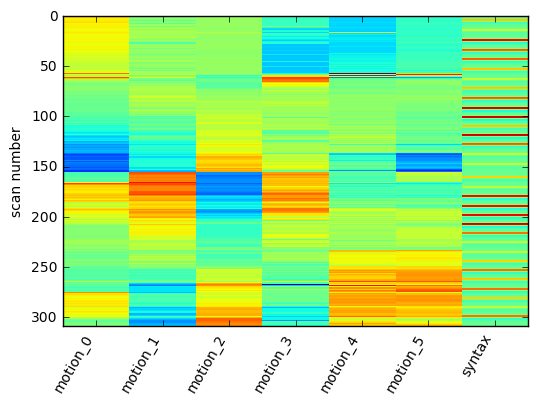

In [10]:
for s in sublist.keys():
    ds, events = pu.preprocess_data(paths, sublist, s, 
                                    filter_params=sg_params, roi=roi, z=True)
    design_kwargs = {'add_regs': None, 'hrf_model': 'canonical', 'drift_model': 'blank'}
    
    rds, des = pu.preprocess_encoding(ds=ds, events=events, c=con, 
                                      mp=mc_params[s], design_kwargs=design_kwargs)
    des.show()
    writeopts = {'outdir': os.path.join('multivariate', 'encoding'), 
                 'sub': s, 'roi': roi, 'con': con}
    bsargs = {'part_attr': 'chunks', 'mode': 'test', 'single_alpha': True, 'normalpha': False,
              'nboots': 1, 'corrmin': .2, 'singcutoff': 1e-10, 'joined': None, 'plot': False, 'use_corr': True}
    wts, oalphas, res, ceil = pa.encoding(paths, ds=rds, des=des, c=con, 
                                          chunklen=12, nchunks=4, alphas=None, 
                                          writeopts=None, bsargs=None)